<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

## Previsão de casos diários - COVID19

Este documento apresenta o modelo de previsão do número de casos diários. Desenvolvido pelo Prof. Dr. Reinaldo Rosa

<hr> 

Este documento apresenta os resultados objetivos com a aplicação do modelo de previsão de casos diários de COVID-19. Esta é uma das implementações desenvolvidas neste trabalho. Abaixo o modelo é executado para os casos diários de cada um dos países e regiões analisados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from covidmodeler import (
    covidmodeler, load_owd, generate_fiocruz_datamean,
    WeightSpectraCase1, WeightSpectraCase2, organize_data,
    plot_g_and_s
)

## Dados nacionais

Esta seção apresenta a aplicação do modelo nos dados gerais dos países que estão sendo considerados neste neste trabalho, sendo eles: (i) Brasil; (ii) Canadá; (iii) México; (iv) Cuba; e (v) Rússia

Carregando os dados

In [2]:
data_owd = load_owd()

Com os dados devidamente carregados, esses são filtrados para as datas maiores ou iguais a 01/04/2020, uma vez que, como informado em outras partes deste projeto, é a data em que há a menor quantidade de zeros possíveis e que evita aos dados de países como Cuba de serem desconsiderados.

> Perceba que, para a execução do modelo, na descrição do trabalho é pedido a execução para dias com número de casos diários acima de 50, porém, ao fazer tal operação, Cuba tem seu *dataset* a um número muito pequeno de observações, assim, para evitar este problema, a data de 01/04/2020 foi definida.

In [3]:
data_owd = data_owd[data_owd.index >= '2020-04-01']

**Definindo as configurações das predições de países**

No código abaixo é possível inserir as configurações utilizadas na execução das predições de todos os países.

In [4]:
days_to_predict = 20
start_date = '2020-04-08'

plot_date_start = '08/04/2020'
plot_date_end = '28/04/2020'

**Brasil - Espectros de peso 1**

In [5]:
data_owd_brazil = data_owd[data_owd["iso_code"] == "BRA"]
data_owd_brazil = generate_fiocruz_datamean(data_owd_brazil)

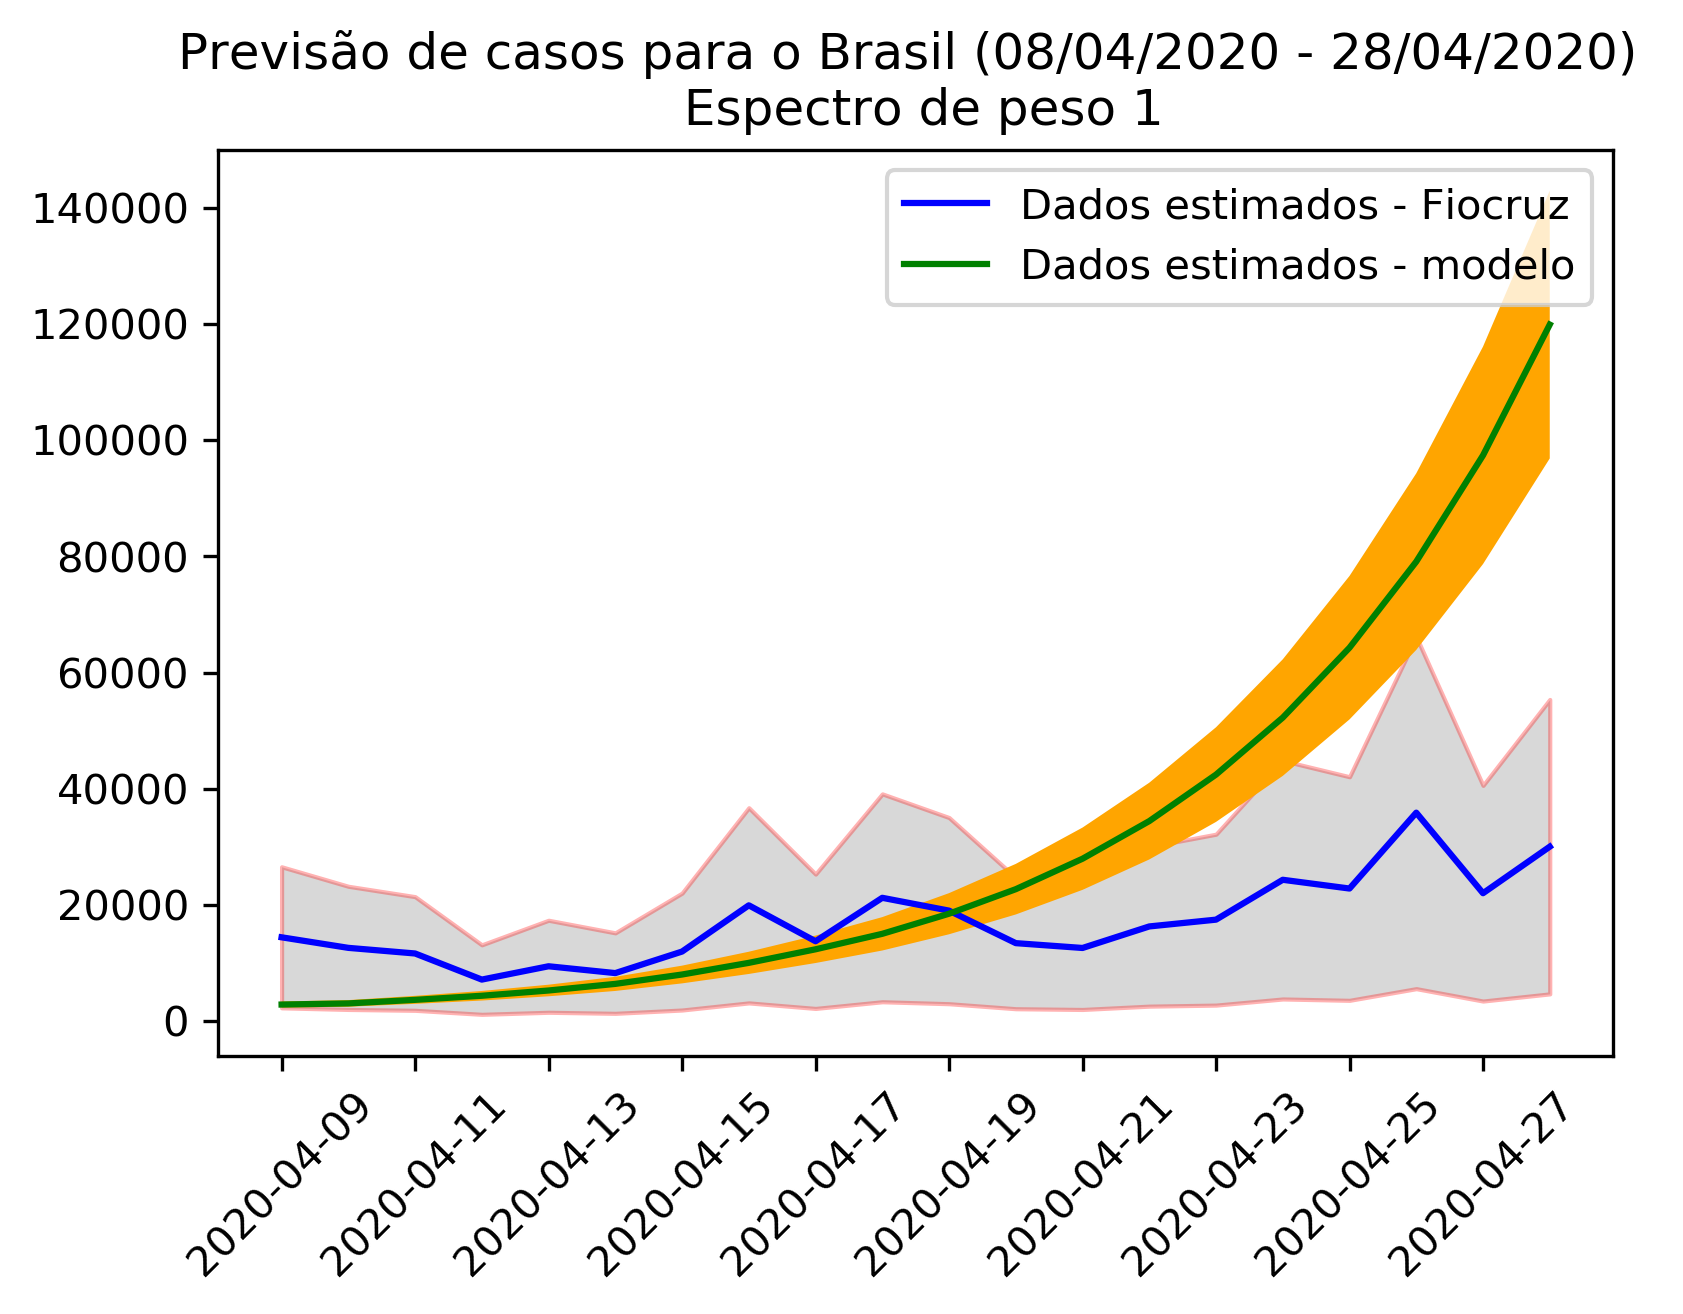

In [6]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data_owd_brazil, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data_owd_brazil)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o Brasil ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Como forma de avaliação do modelo desenvolvido, abaixo são apresentados as curvas $g$ e $s$ da execução realizada.

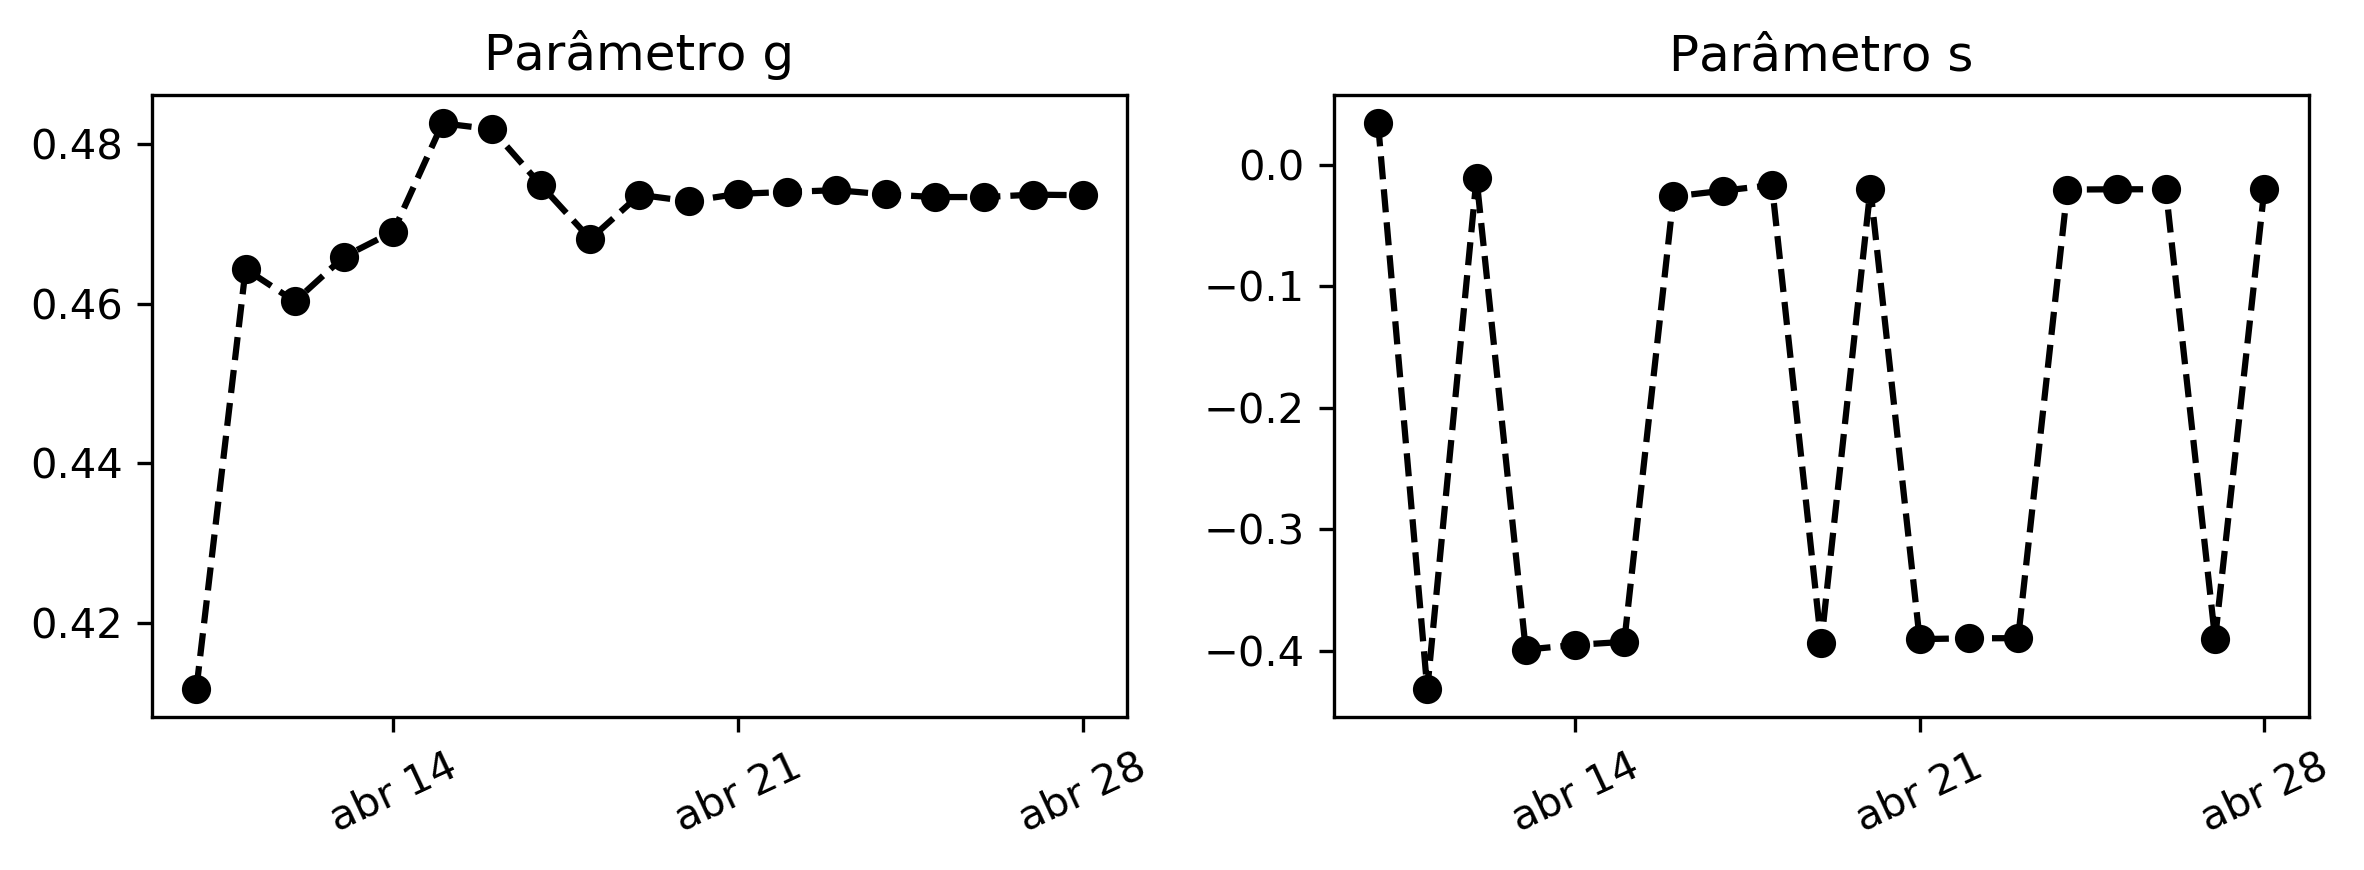

In [7]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Brasil - Espectro de pesos 2**

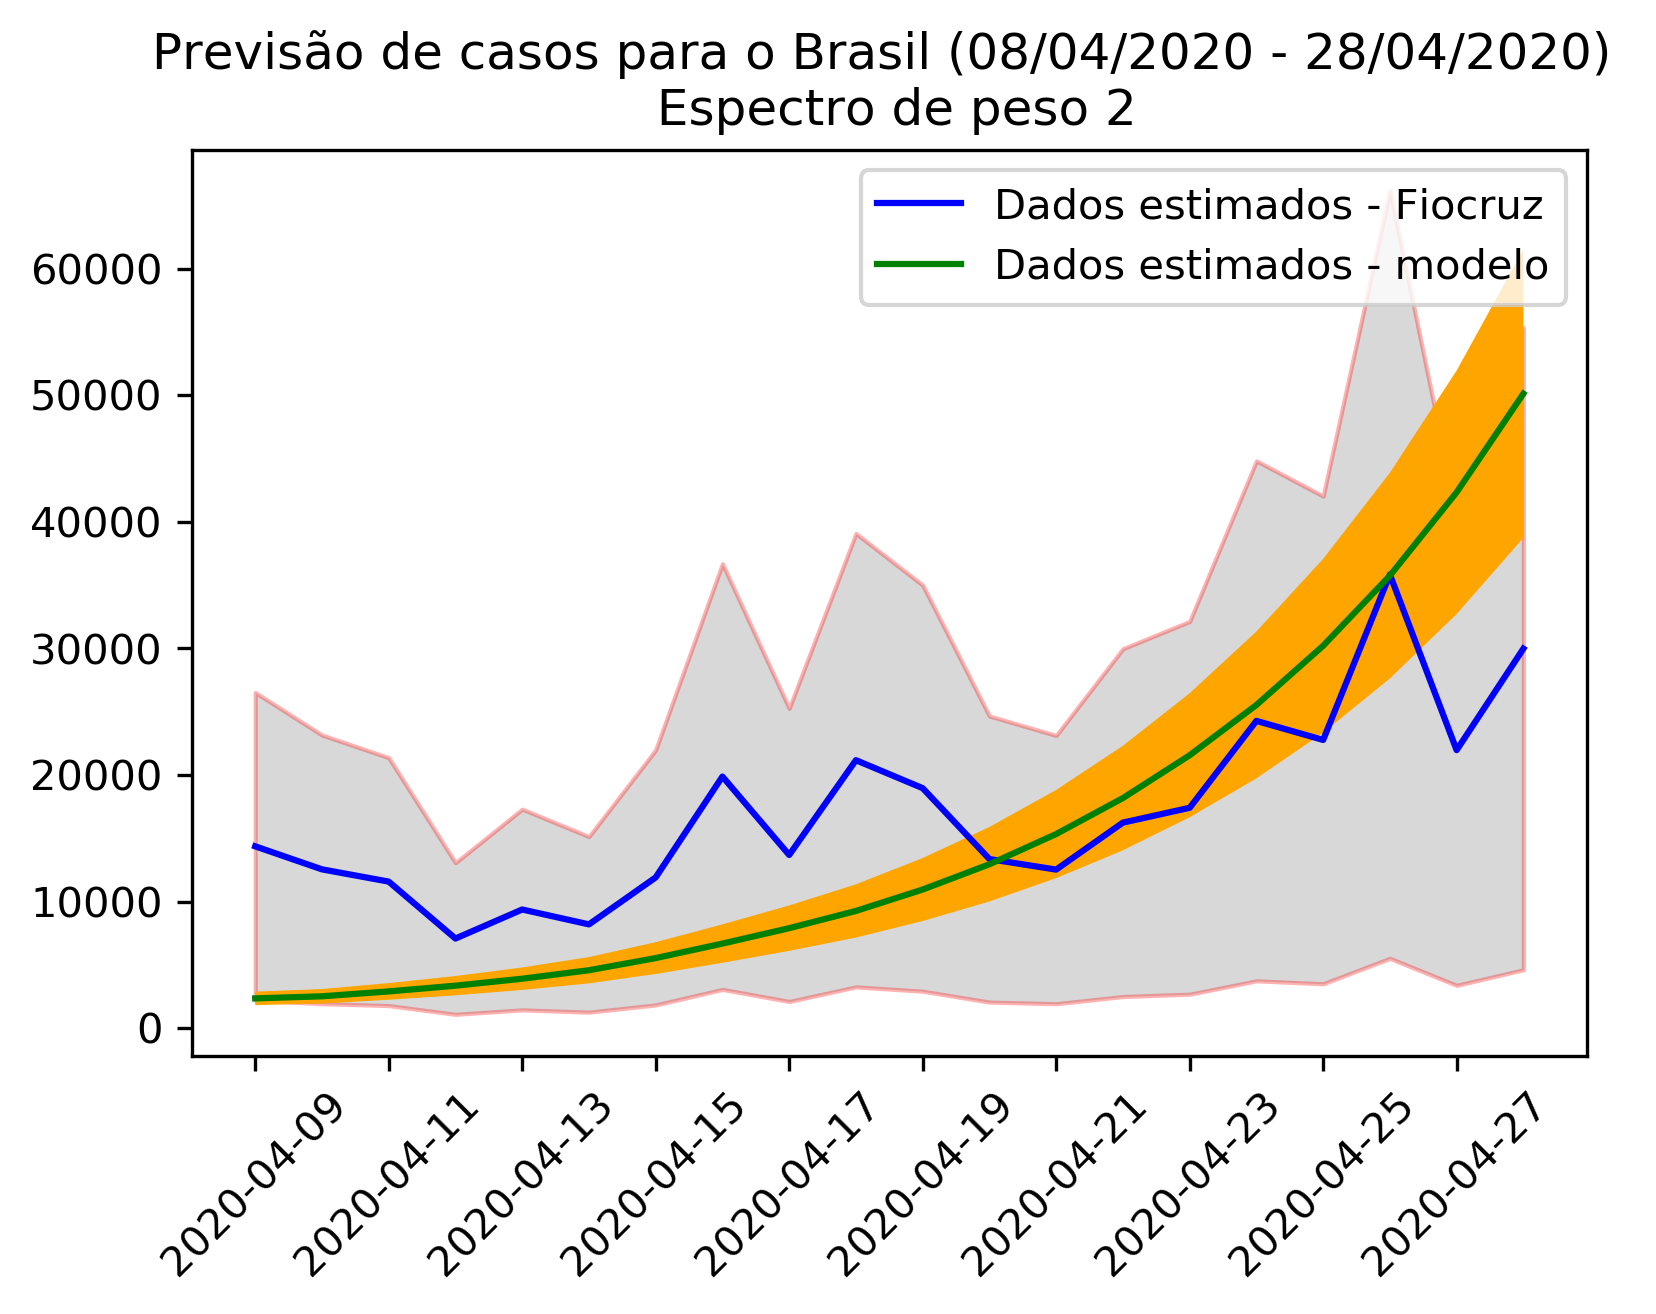

In [8]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data_owd_brazil, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data_owd_brazil)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o Brasil ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo sãoa presentadas as curvas $g$ e $s$

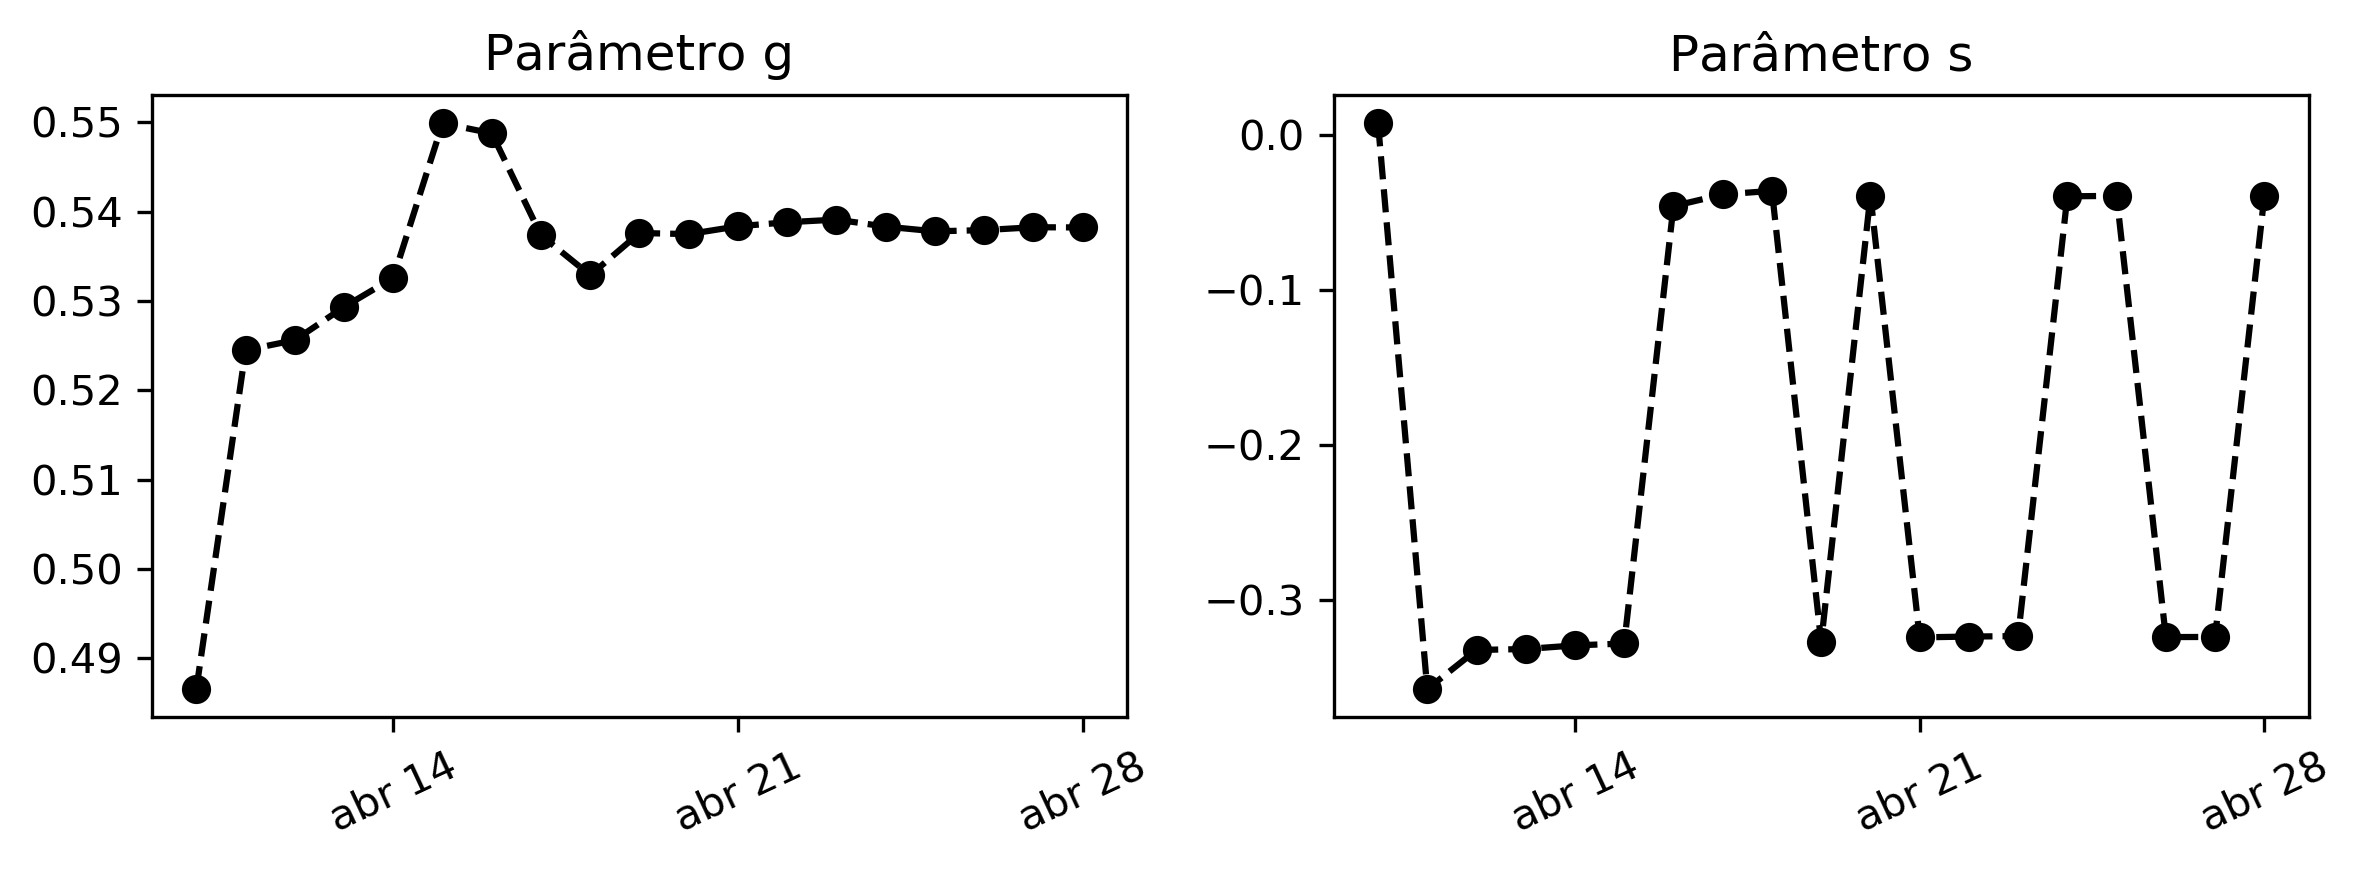

In [9]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Canadá - Espectro de peso 1**

In [10]:
data = data_owd[data_owd["iso_code"] == "CAN"]
data = generate_fiocruz_datamean(data)

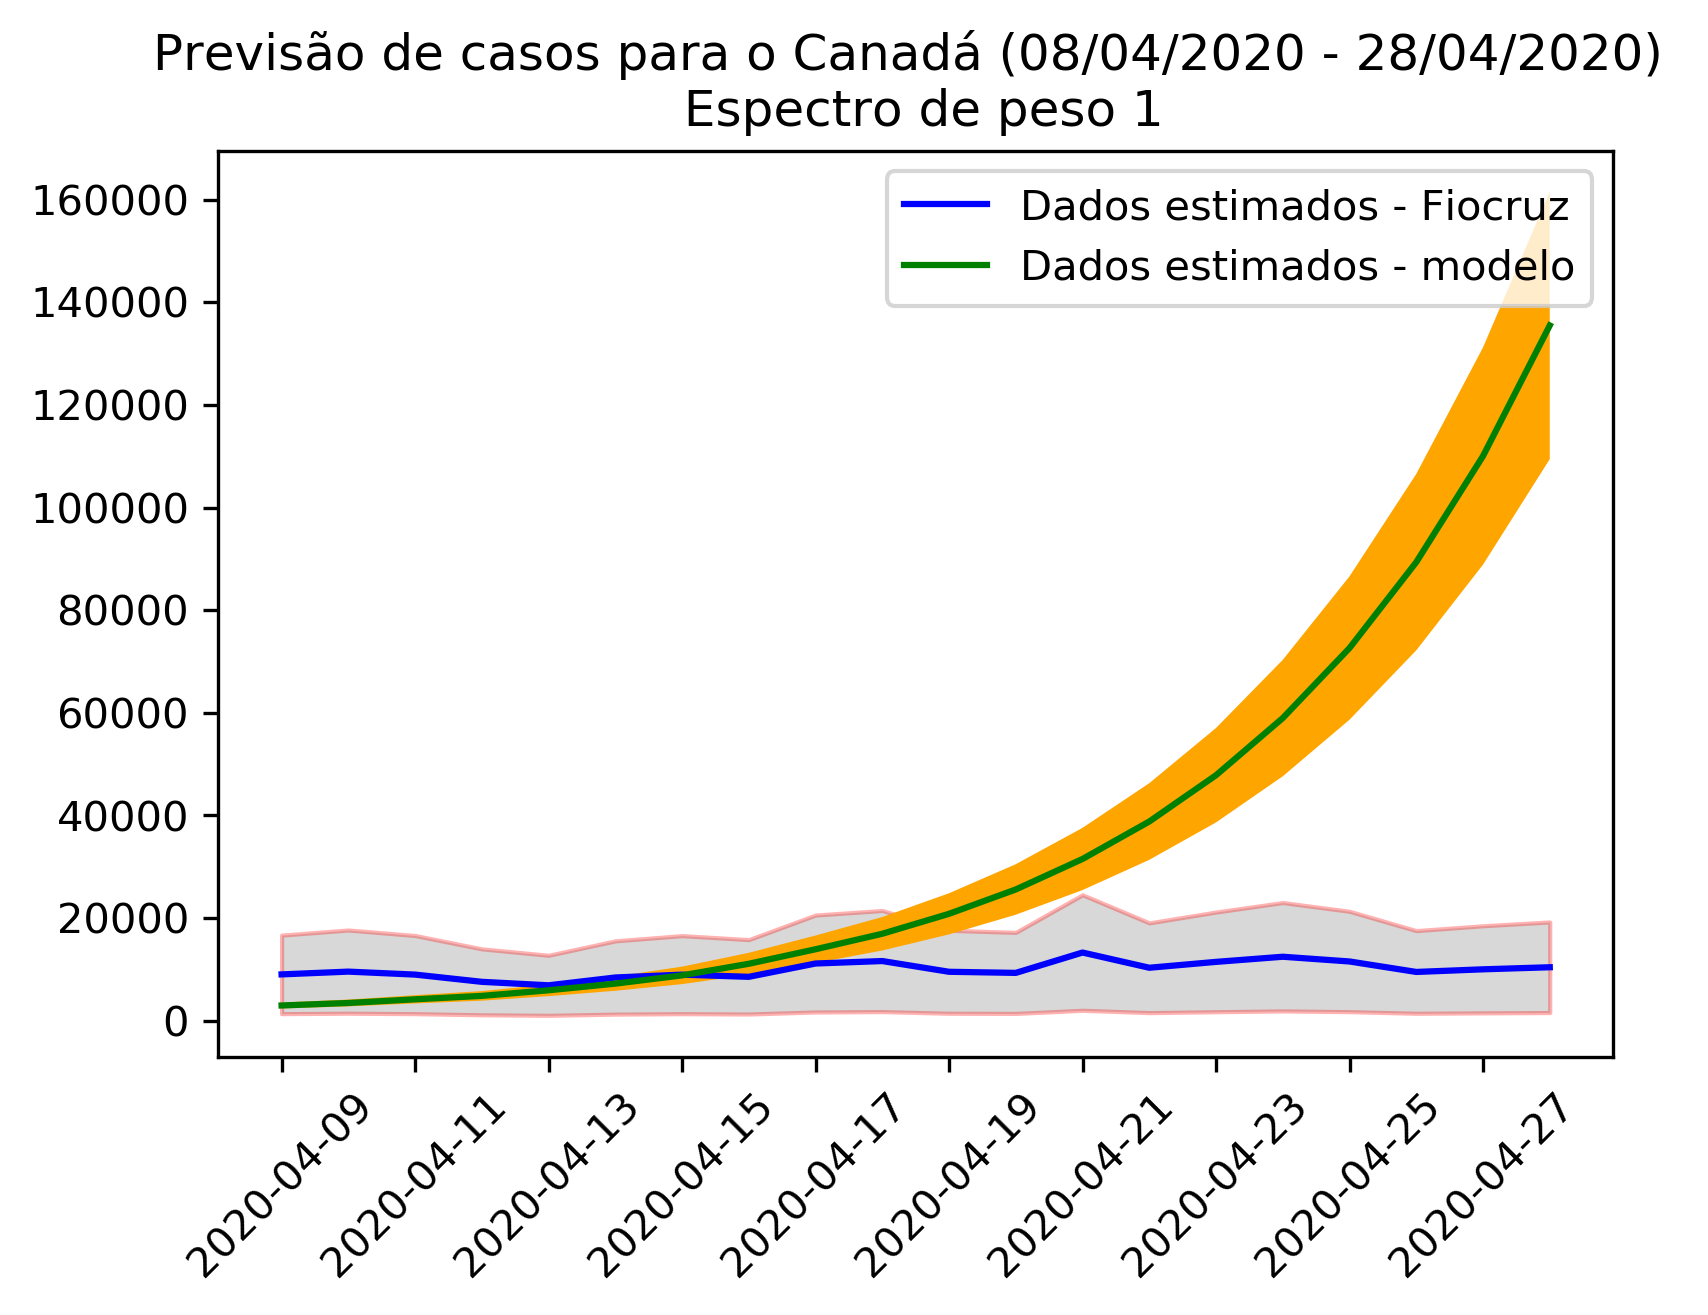

In [11]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o Canadá ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Com a simulação realizada, as curvas $g$ e $s$ são geradas e apresentadas abaixo

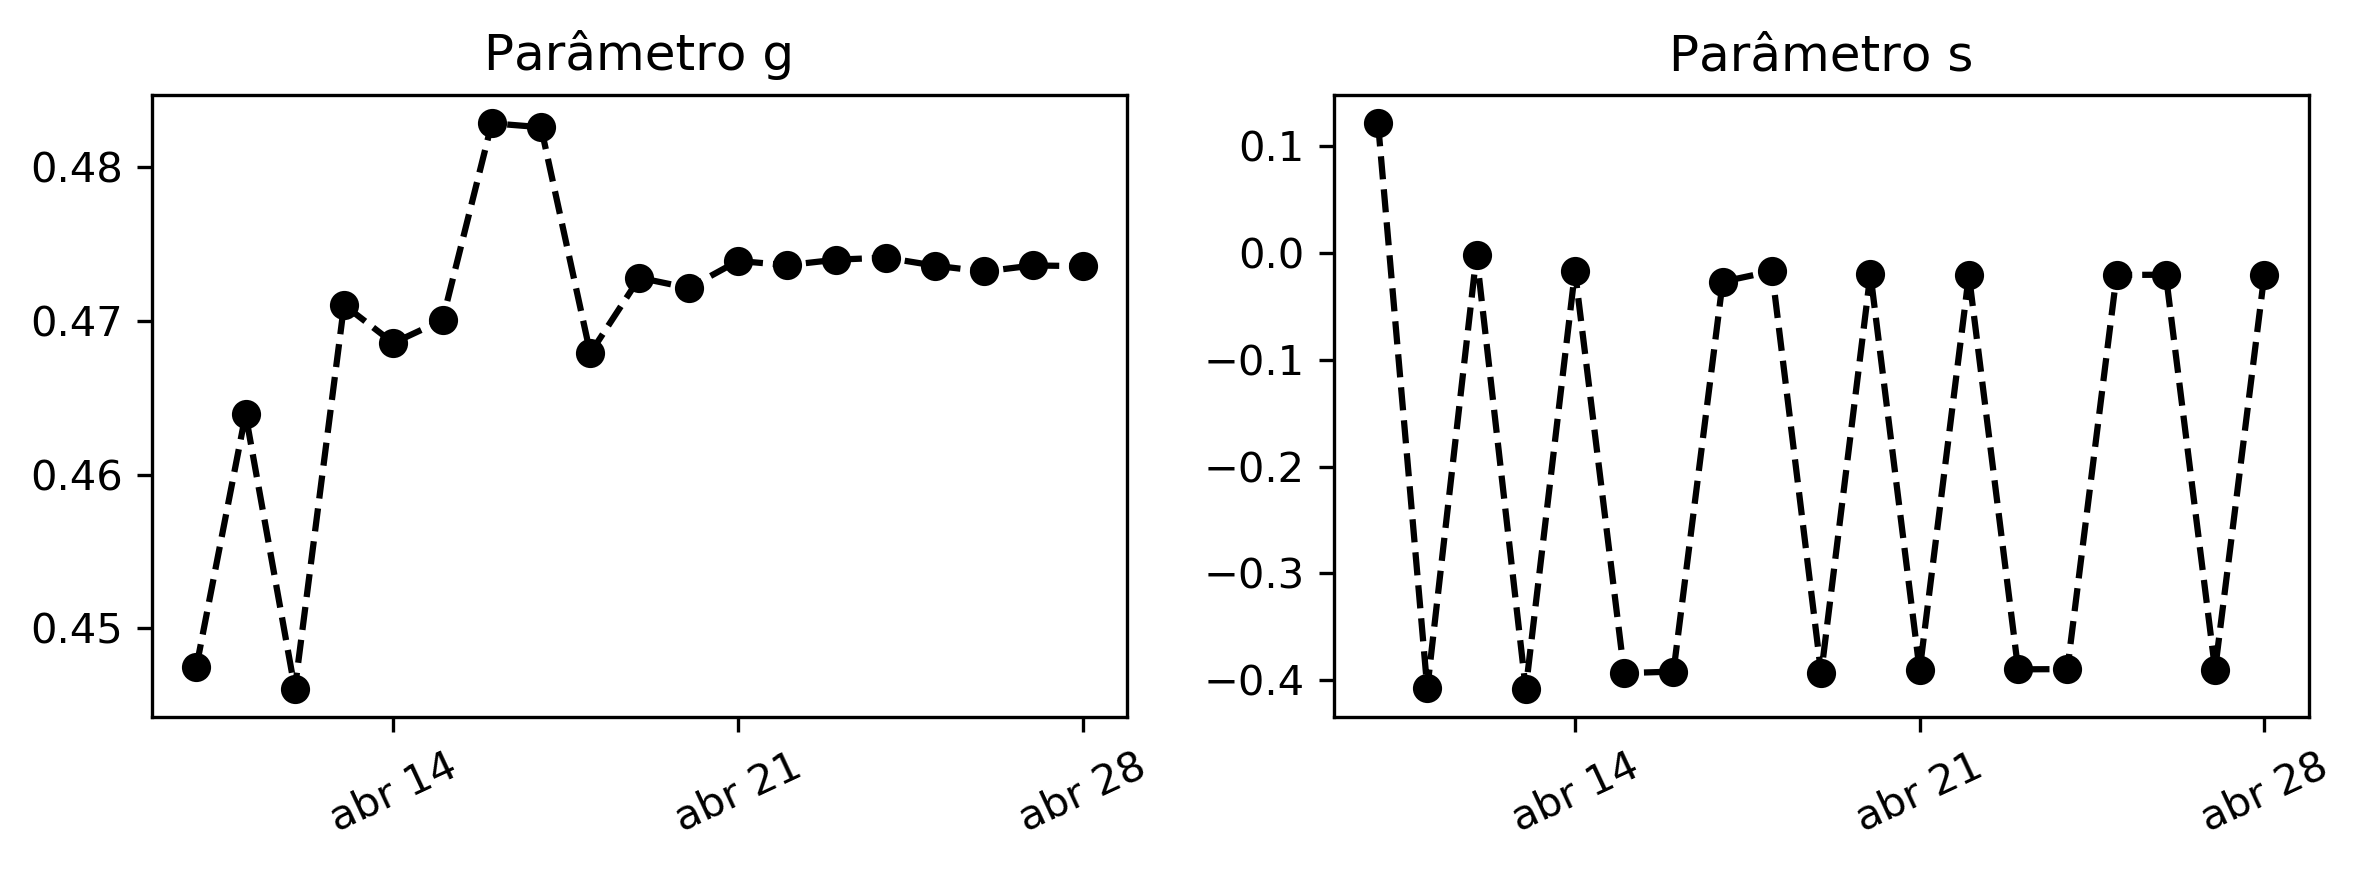

In [12]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Canadá - Espectro de peso 2**

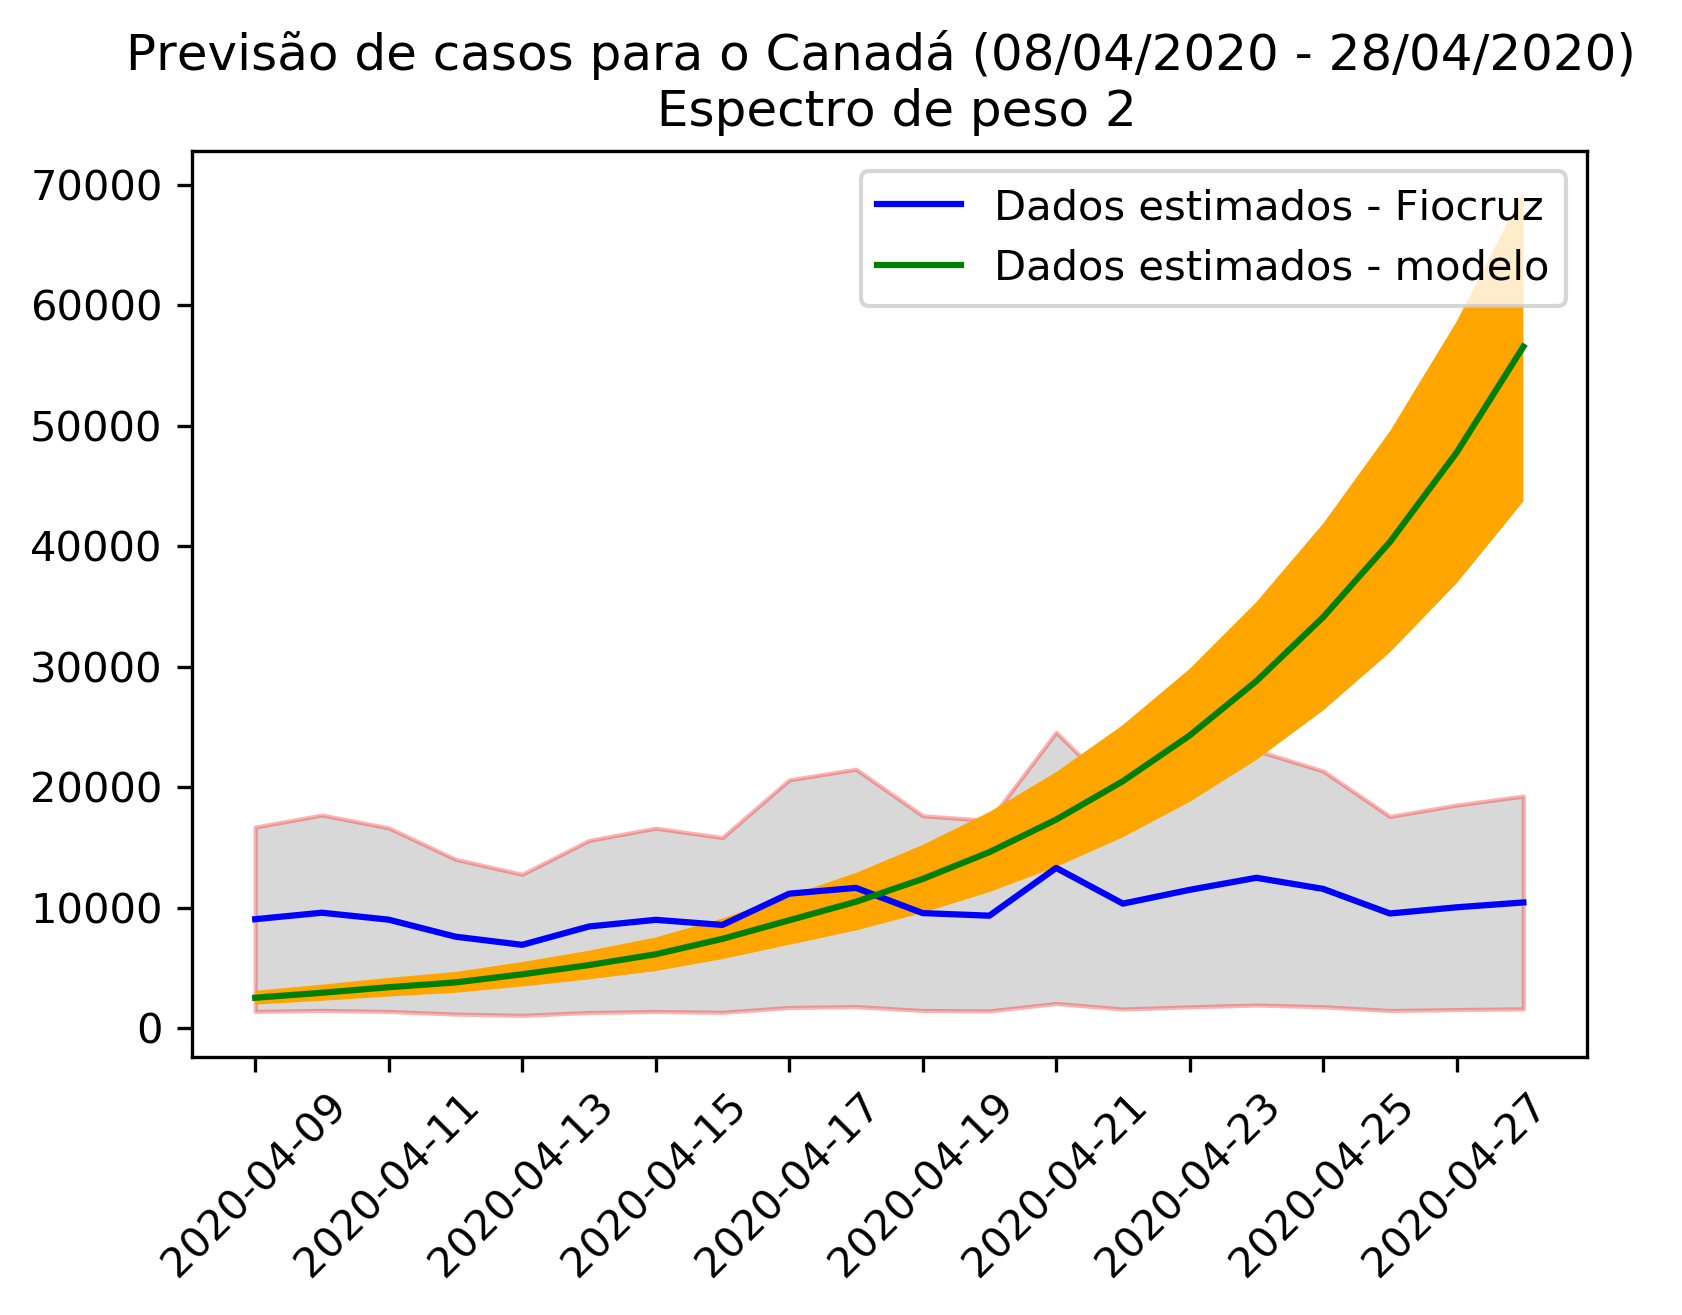

In [13]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o Canadá ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo, são apresentados os valores de $g$ e $s$ ao longo dos dias de predição

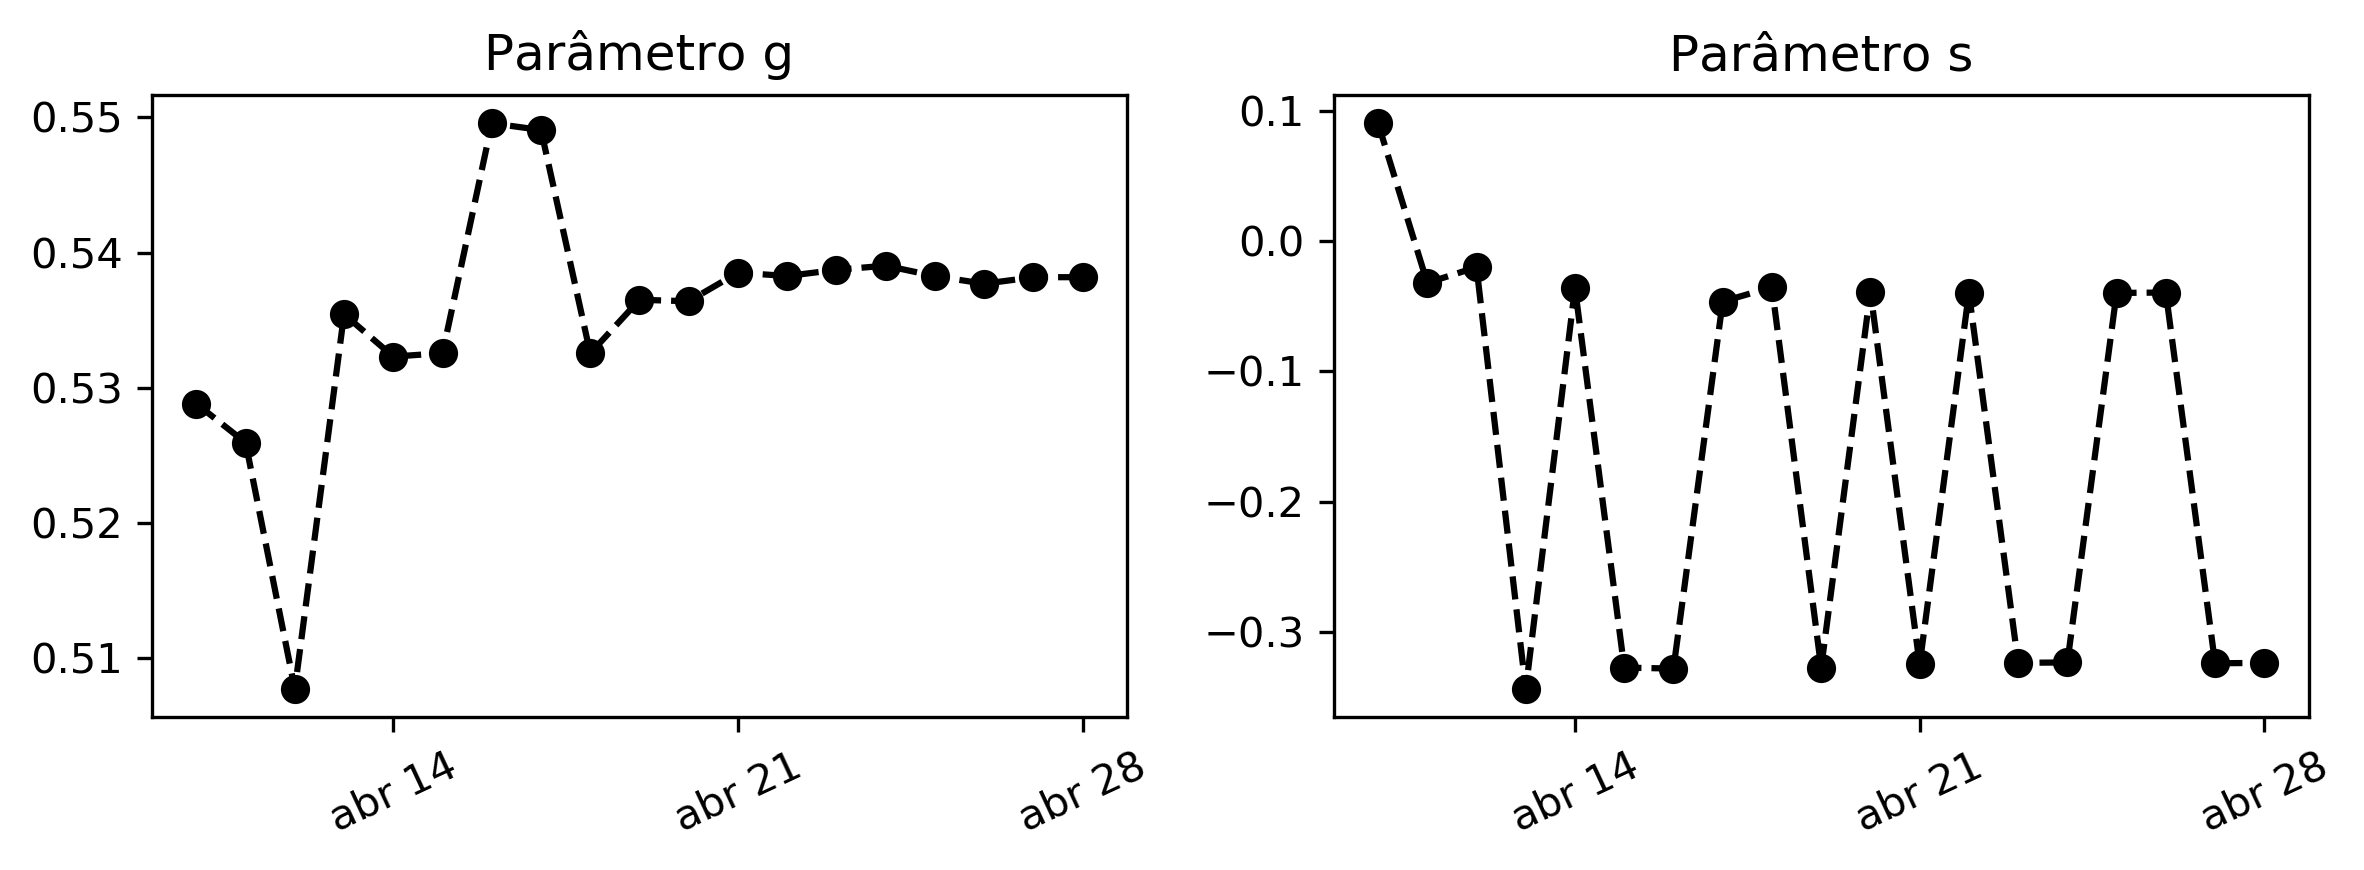

In [14]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**México - Espectro de peso 1**

In [15]:
data = data_owd[data_owd["iso_code"] == "MEX"]
data = generate_fiocruz_datamean(data)

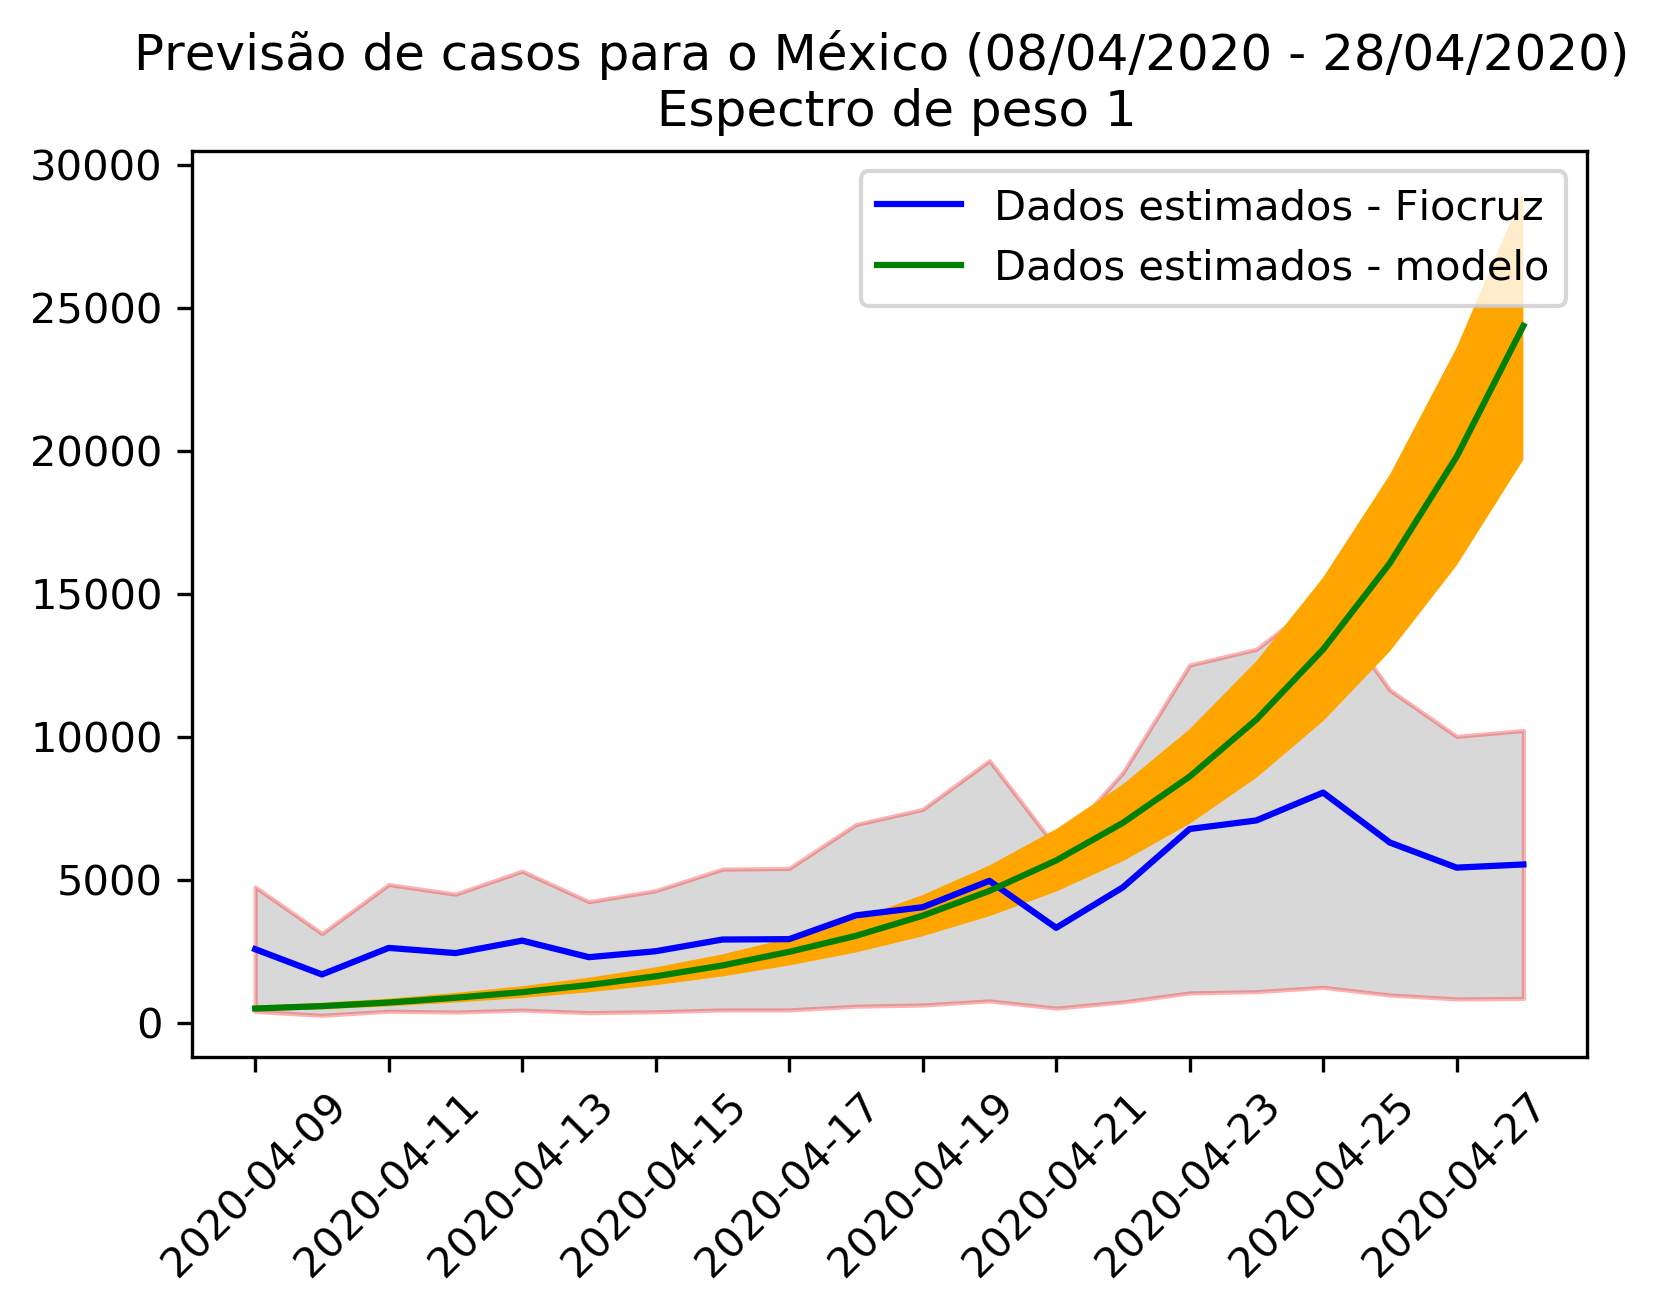

In [16]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o México ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

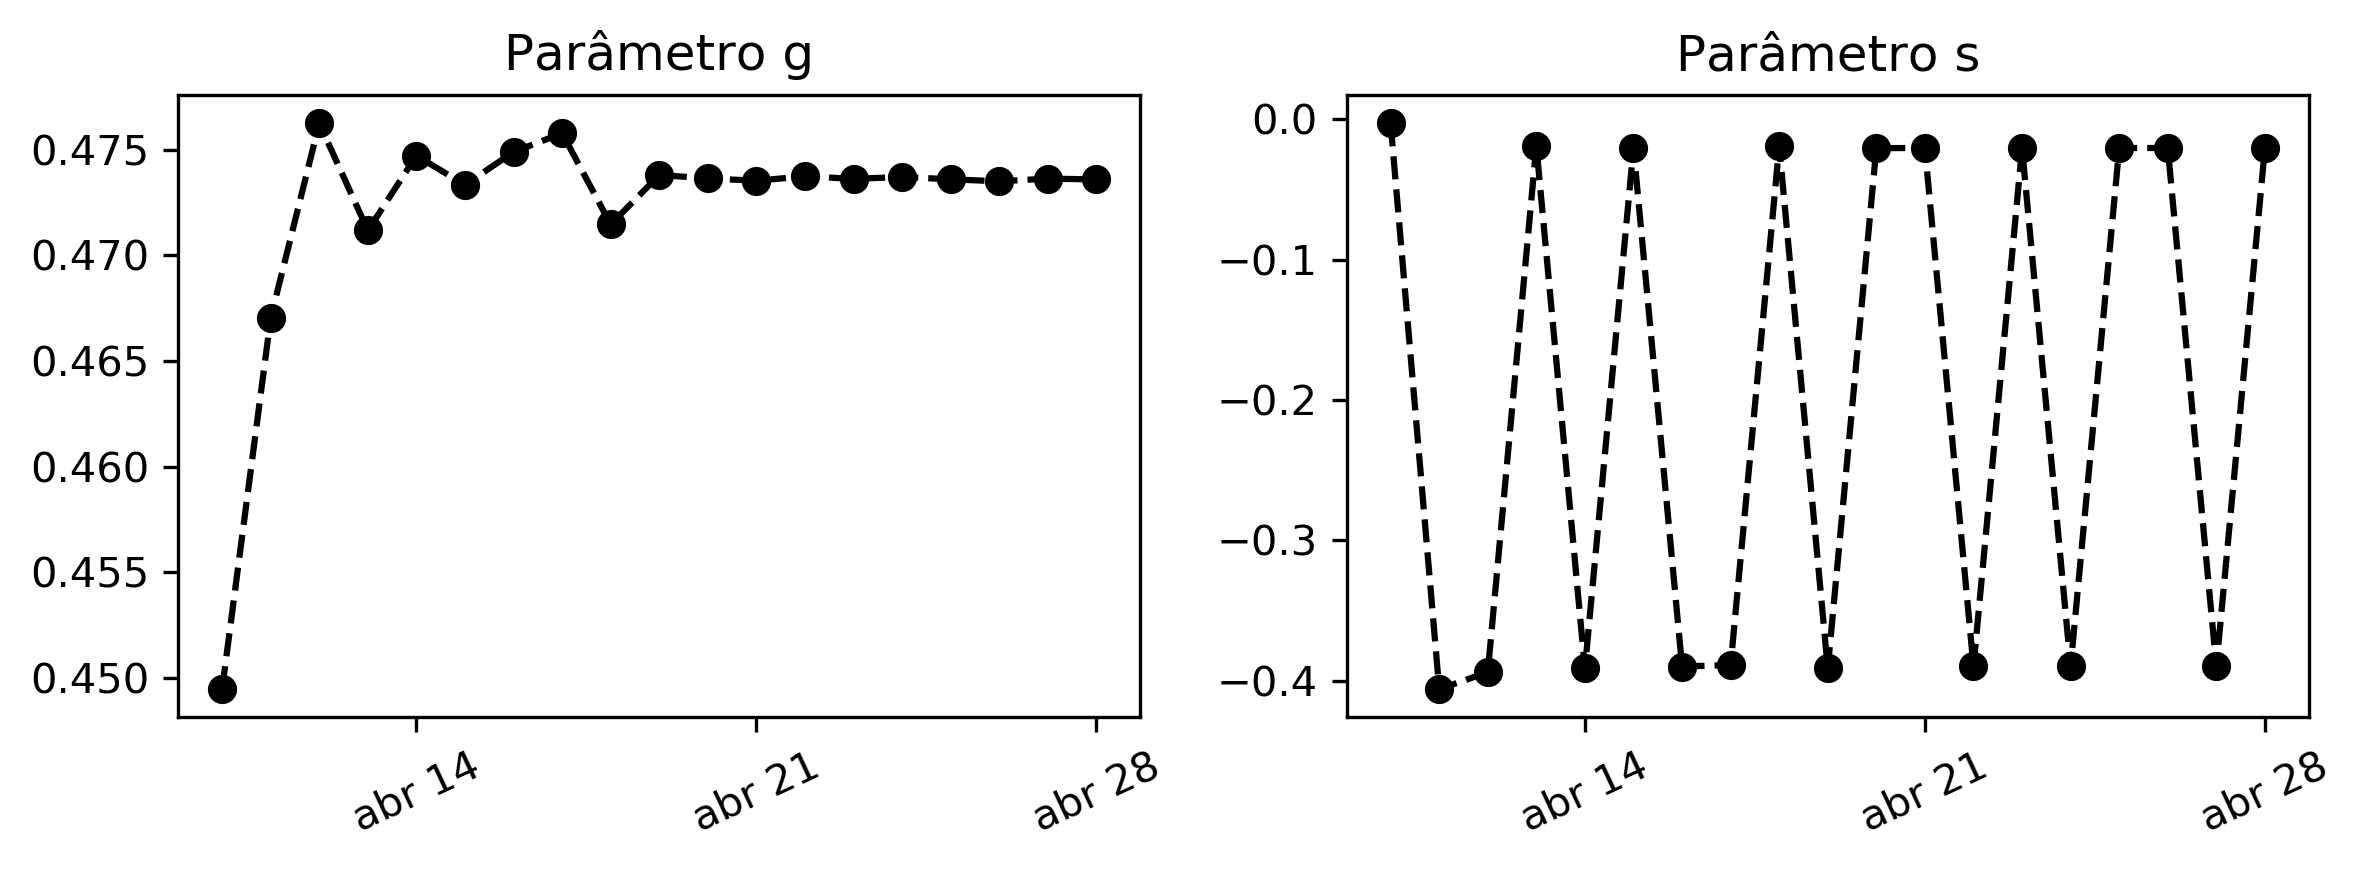

In [17]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**México - Espectro de peso 2**

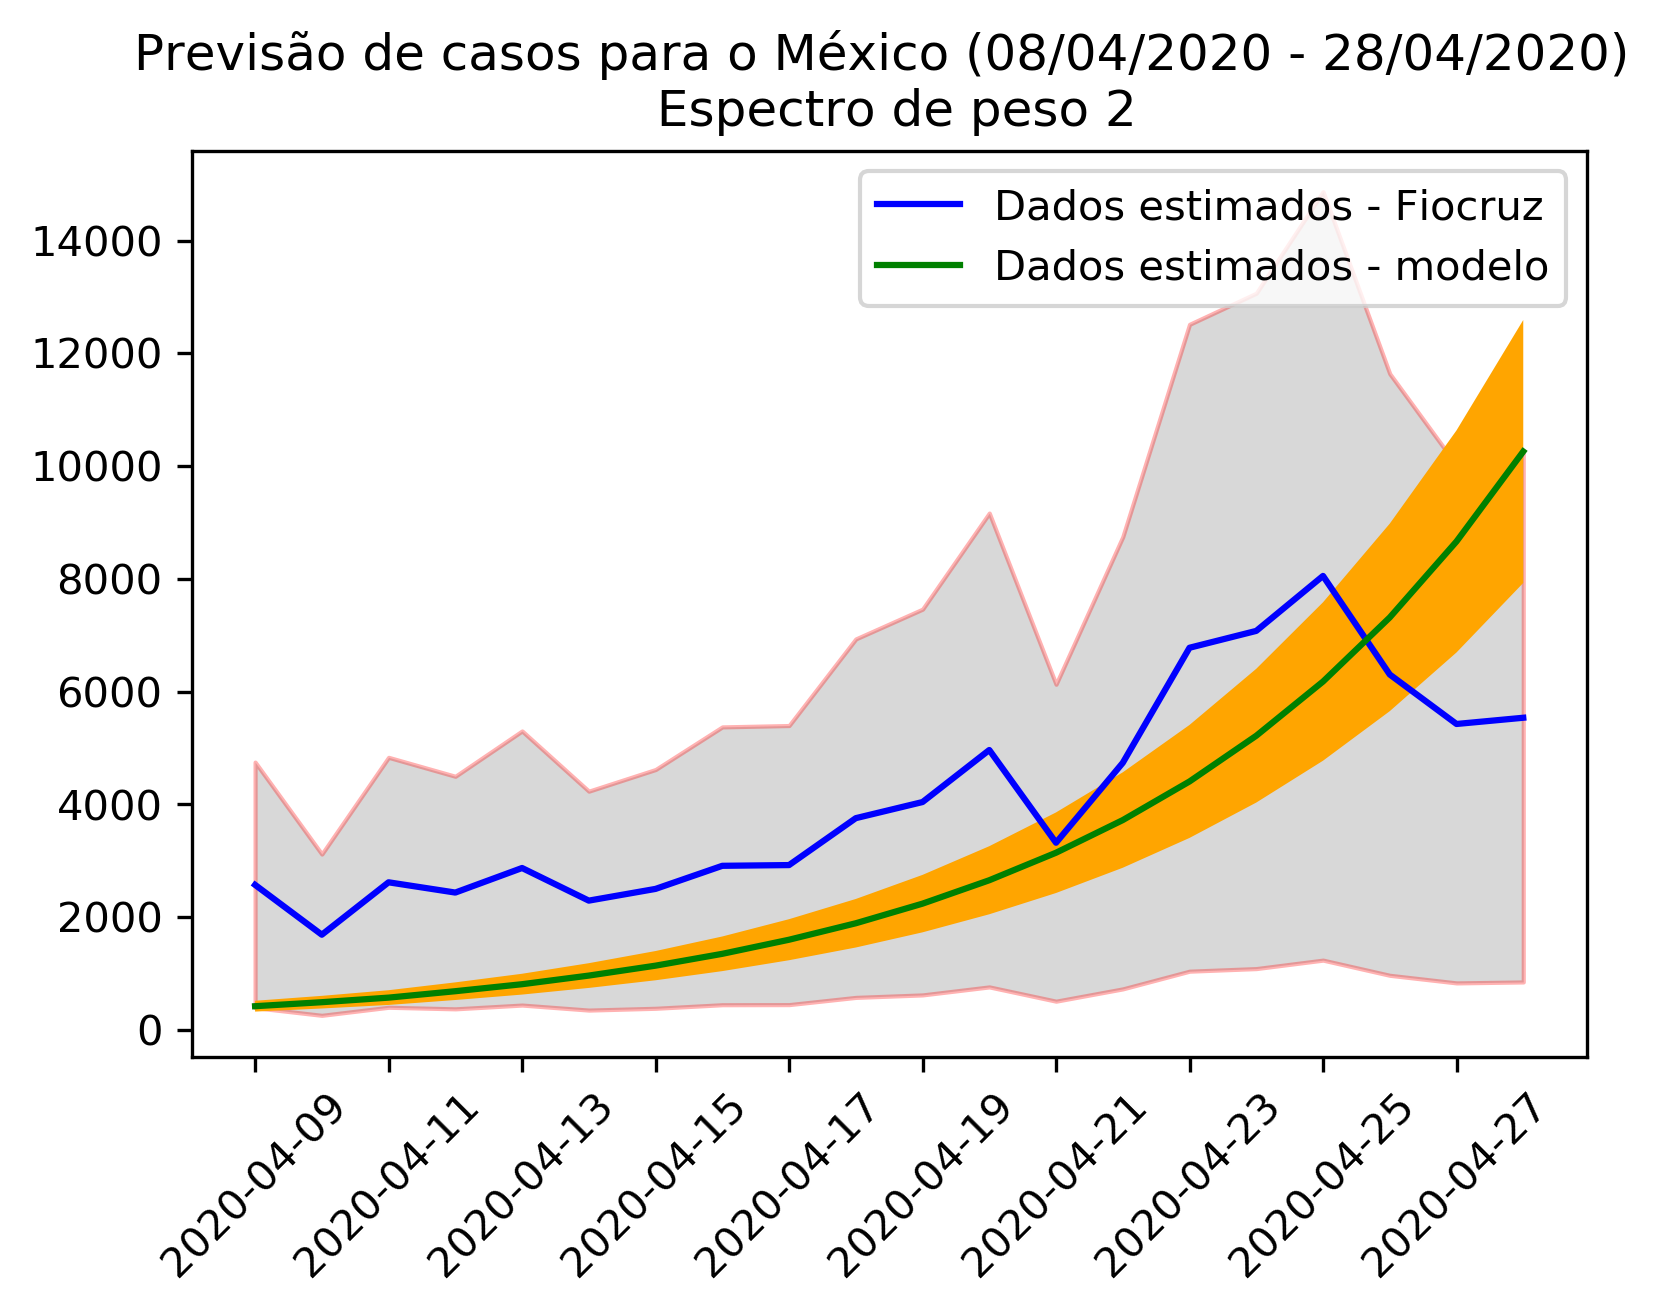

In [18]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o México ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

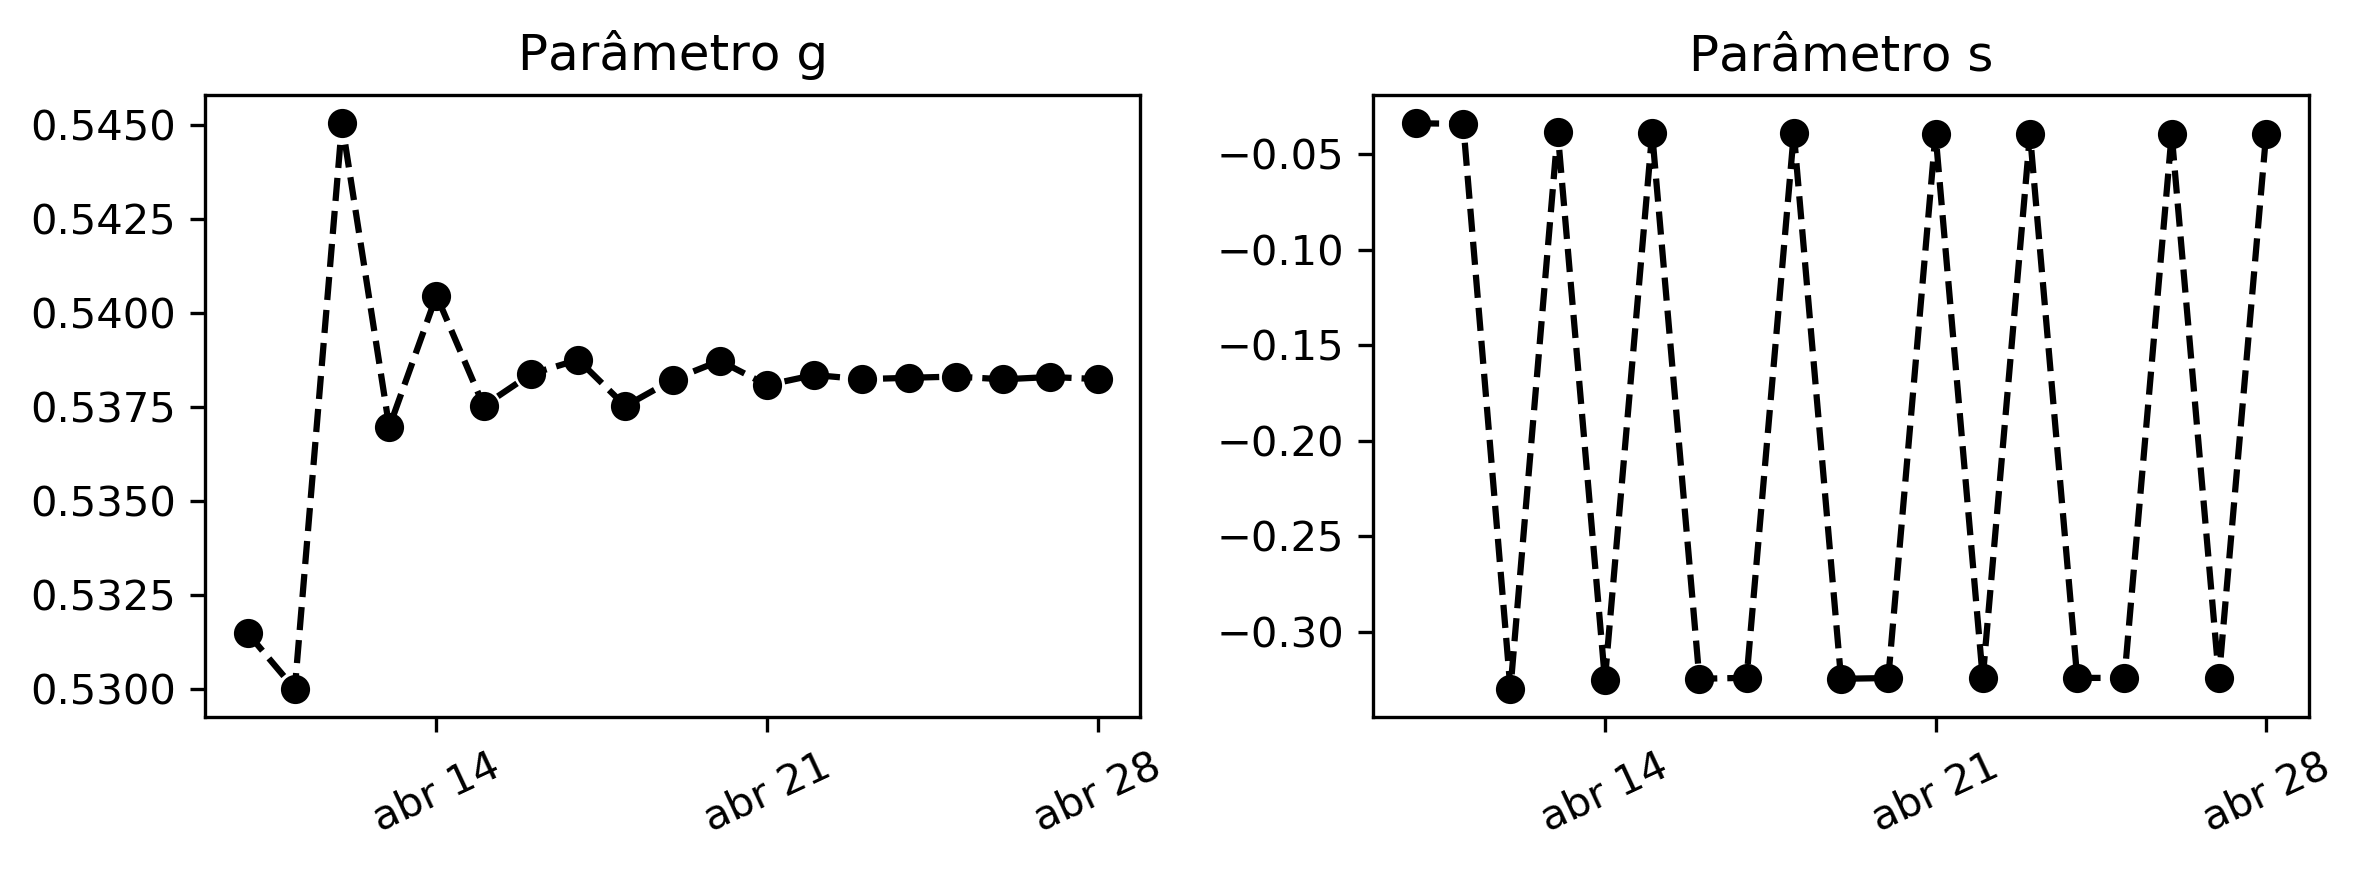

In [19]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Cuba - Espectro de peso 1**

In [20]:
data = data_owd[data_owd["iso_code"] == "CUB"]
data = generate_fiocruz_datamean(data)

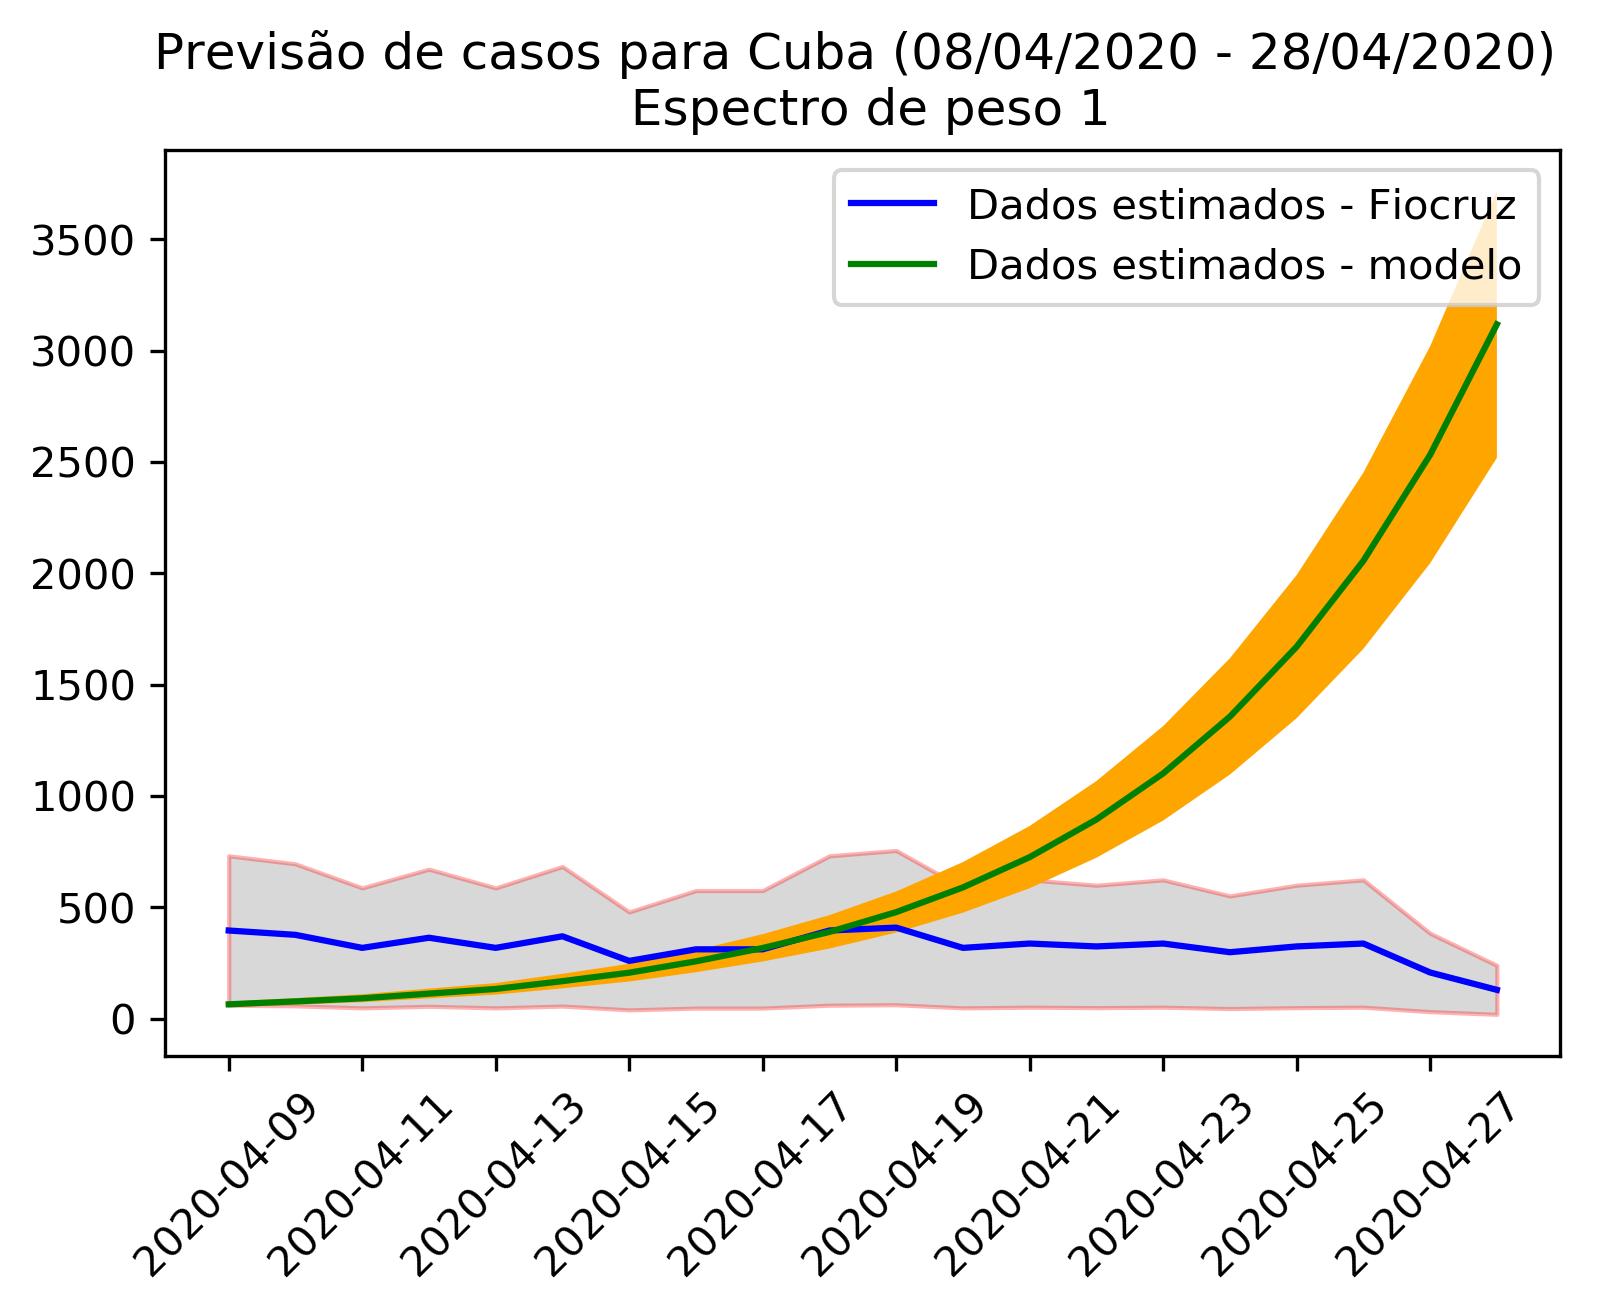

In [21]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para Cuba ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

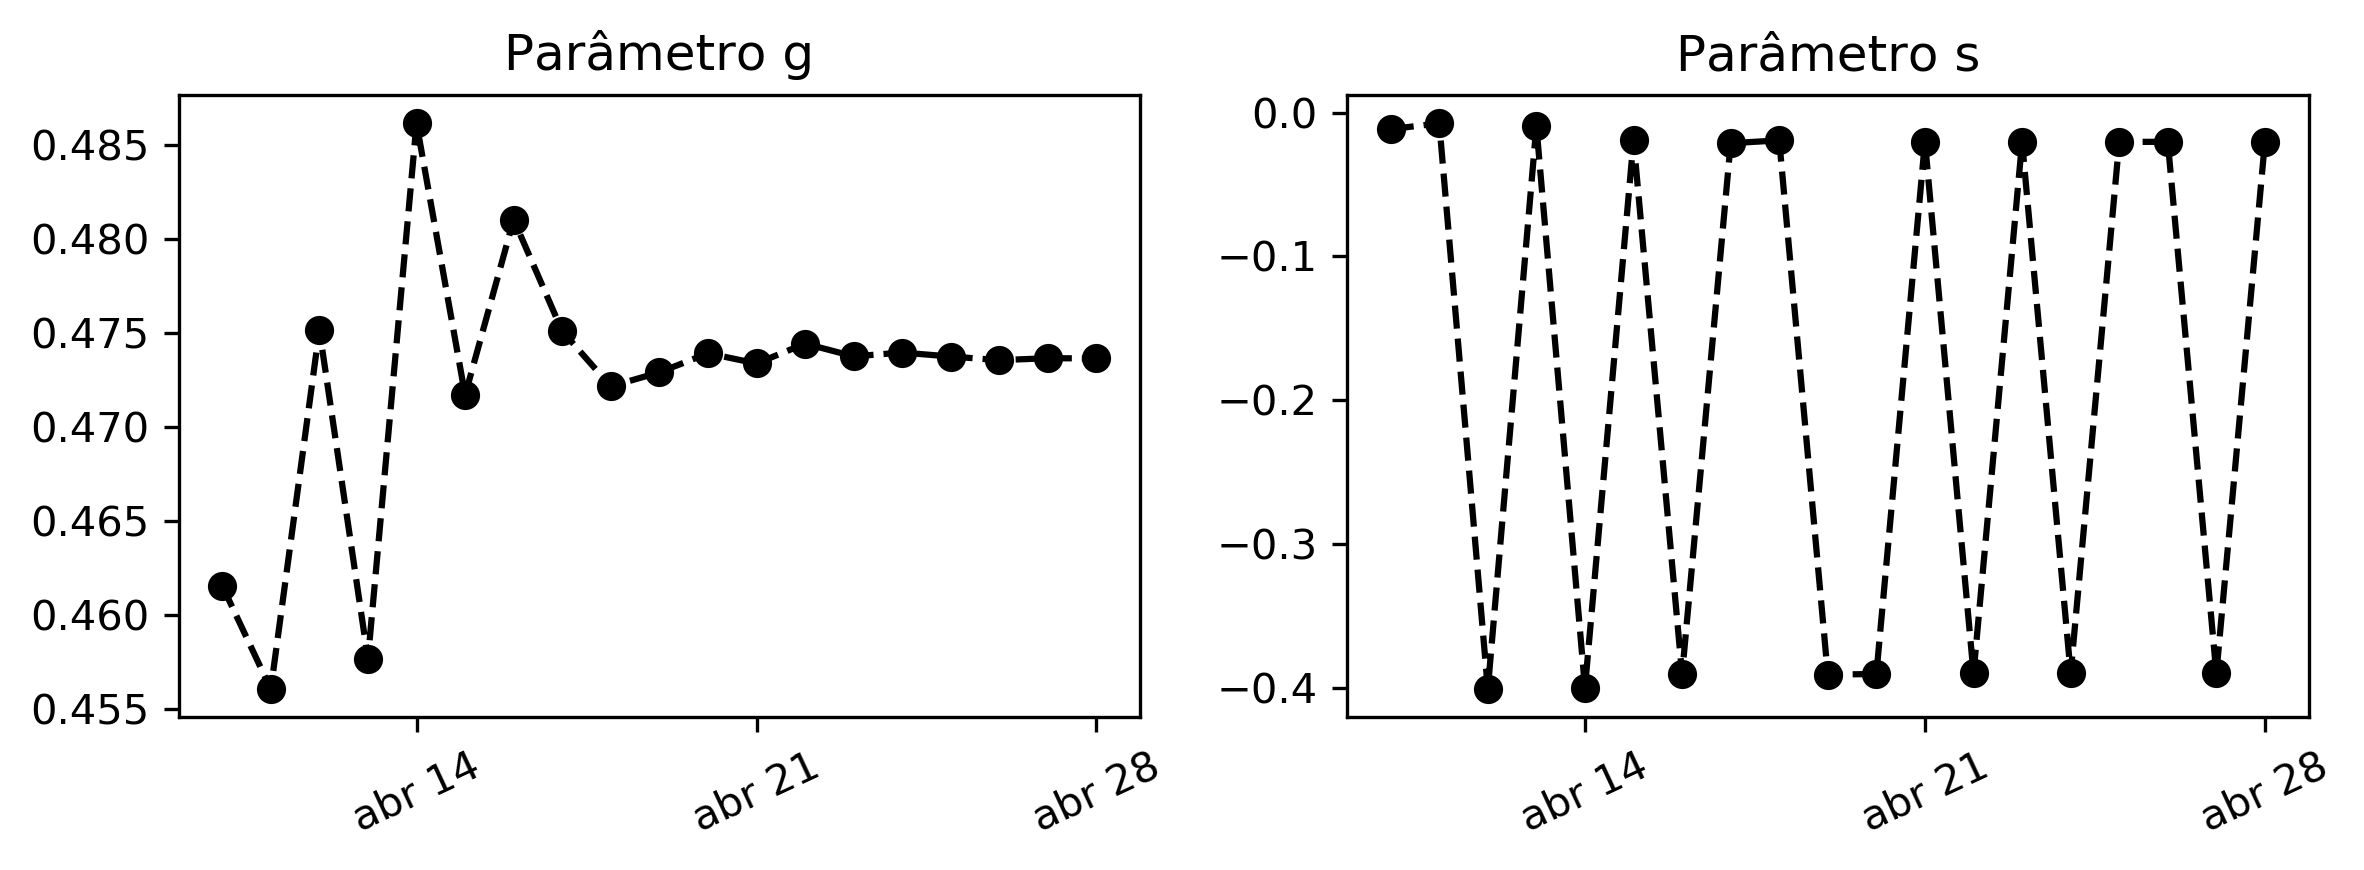

In [22]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Cuba - Espectro de peso 2**

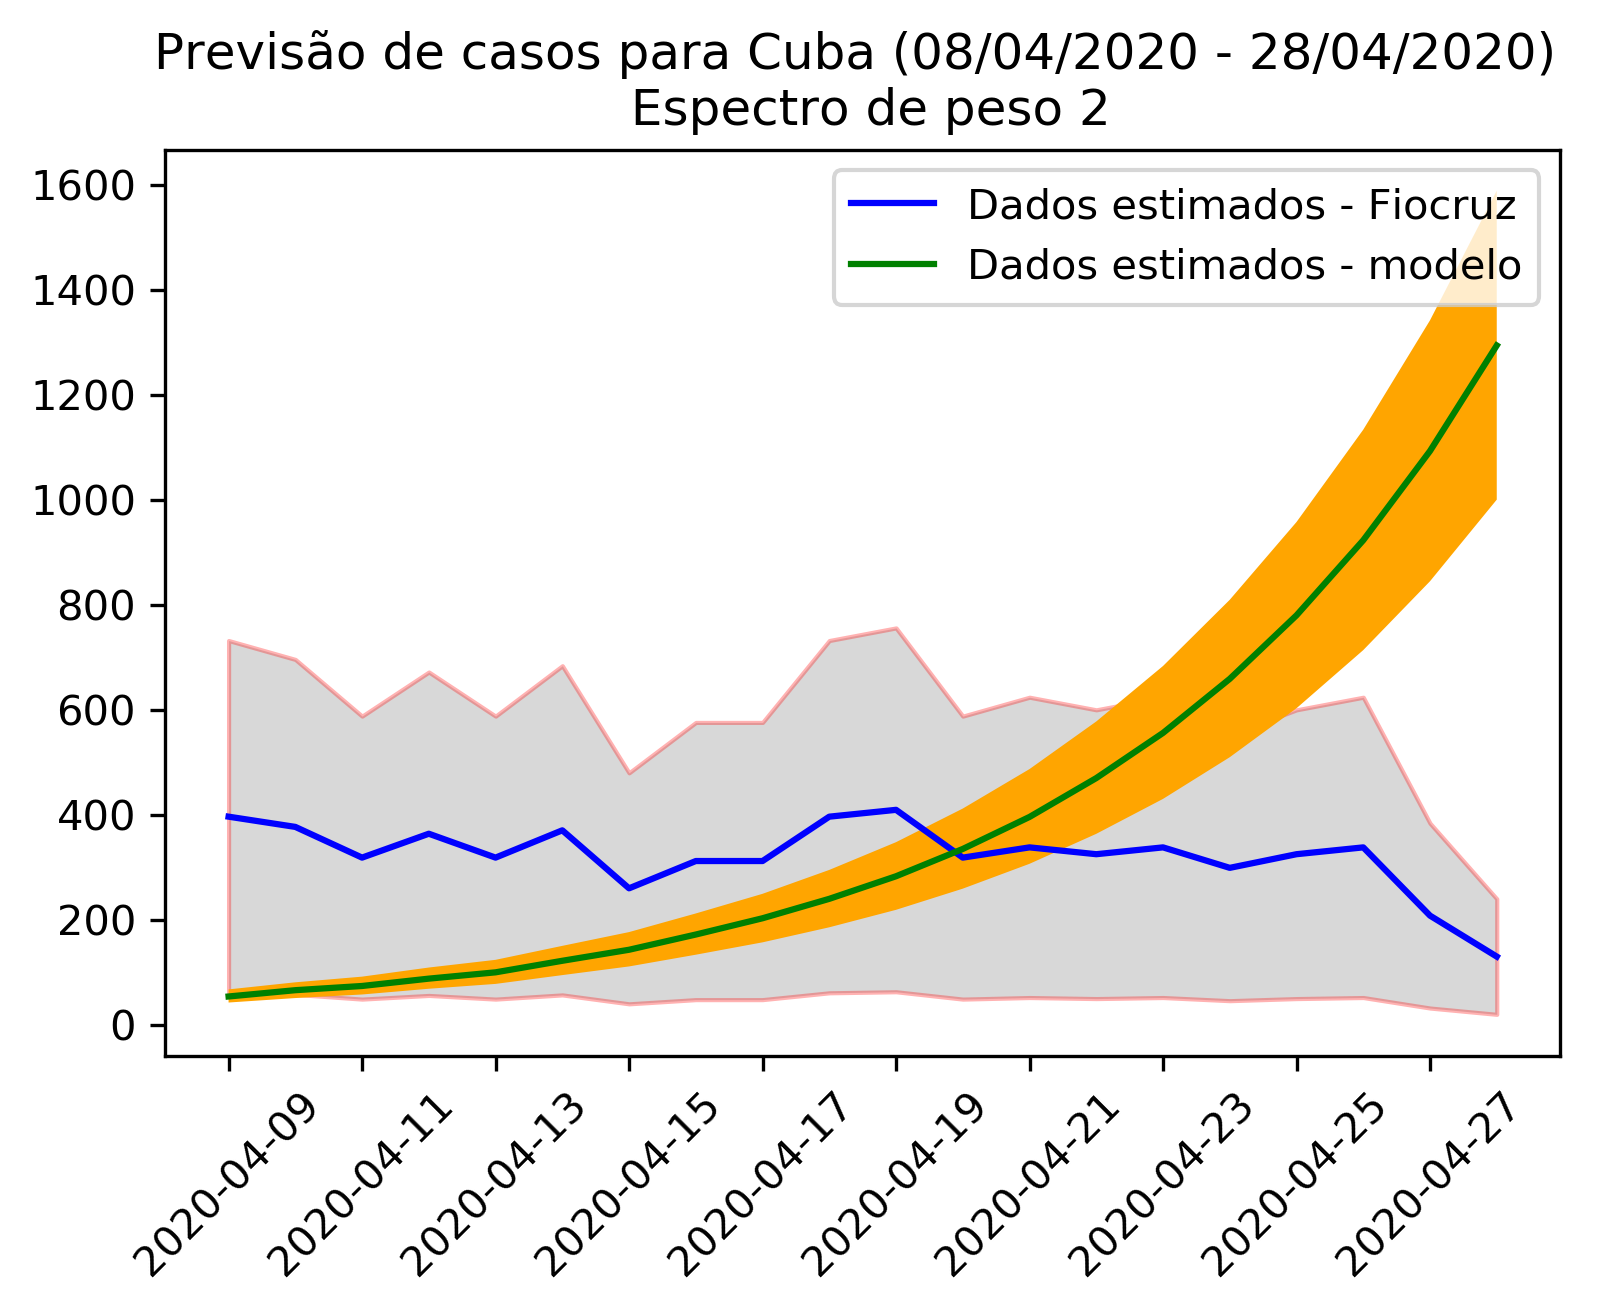

In [23]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para Cuba ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

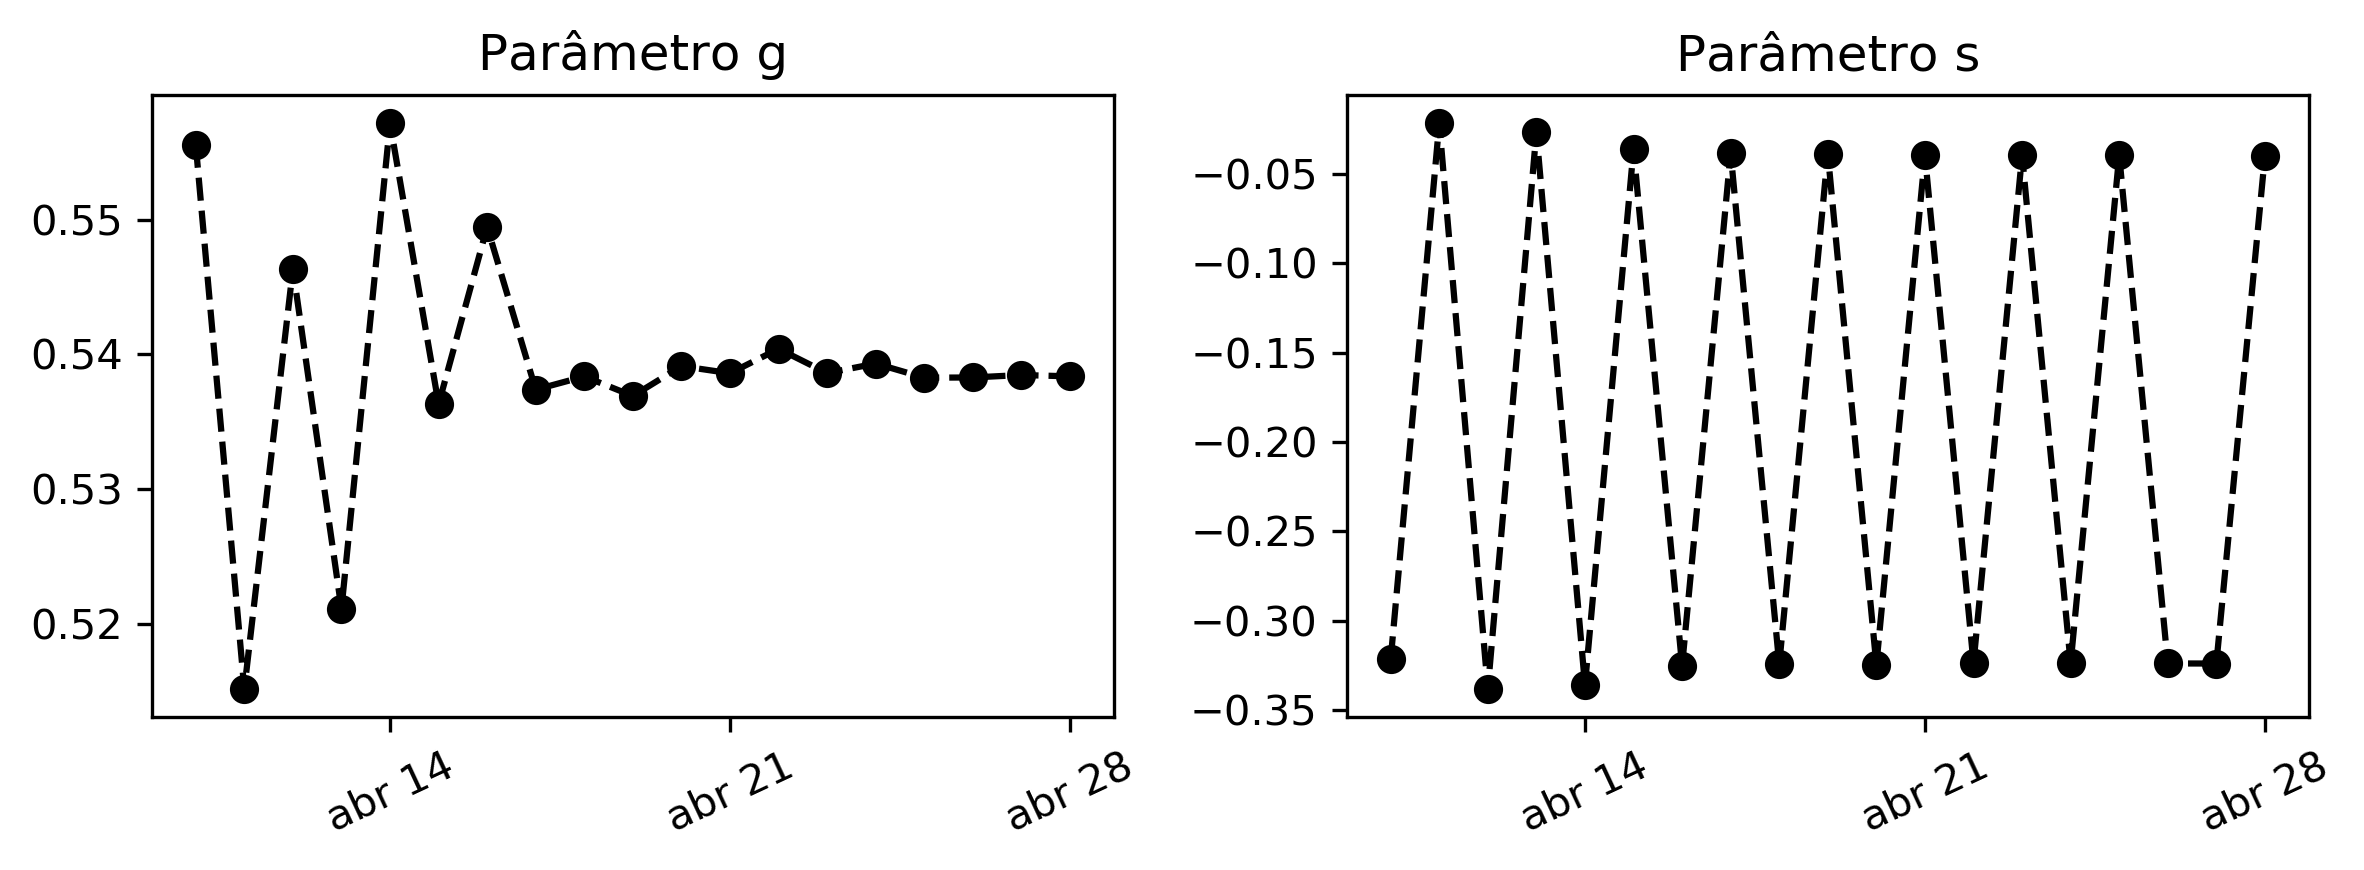

In [24]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Rússia - Espectro de peso 1**

In [25]:
data = data_owd[data_owd["iso_code"] == "RUS"]
data = generate_fiocruz_datamean(data)

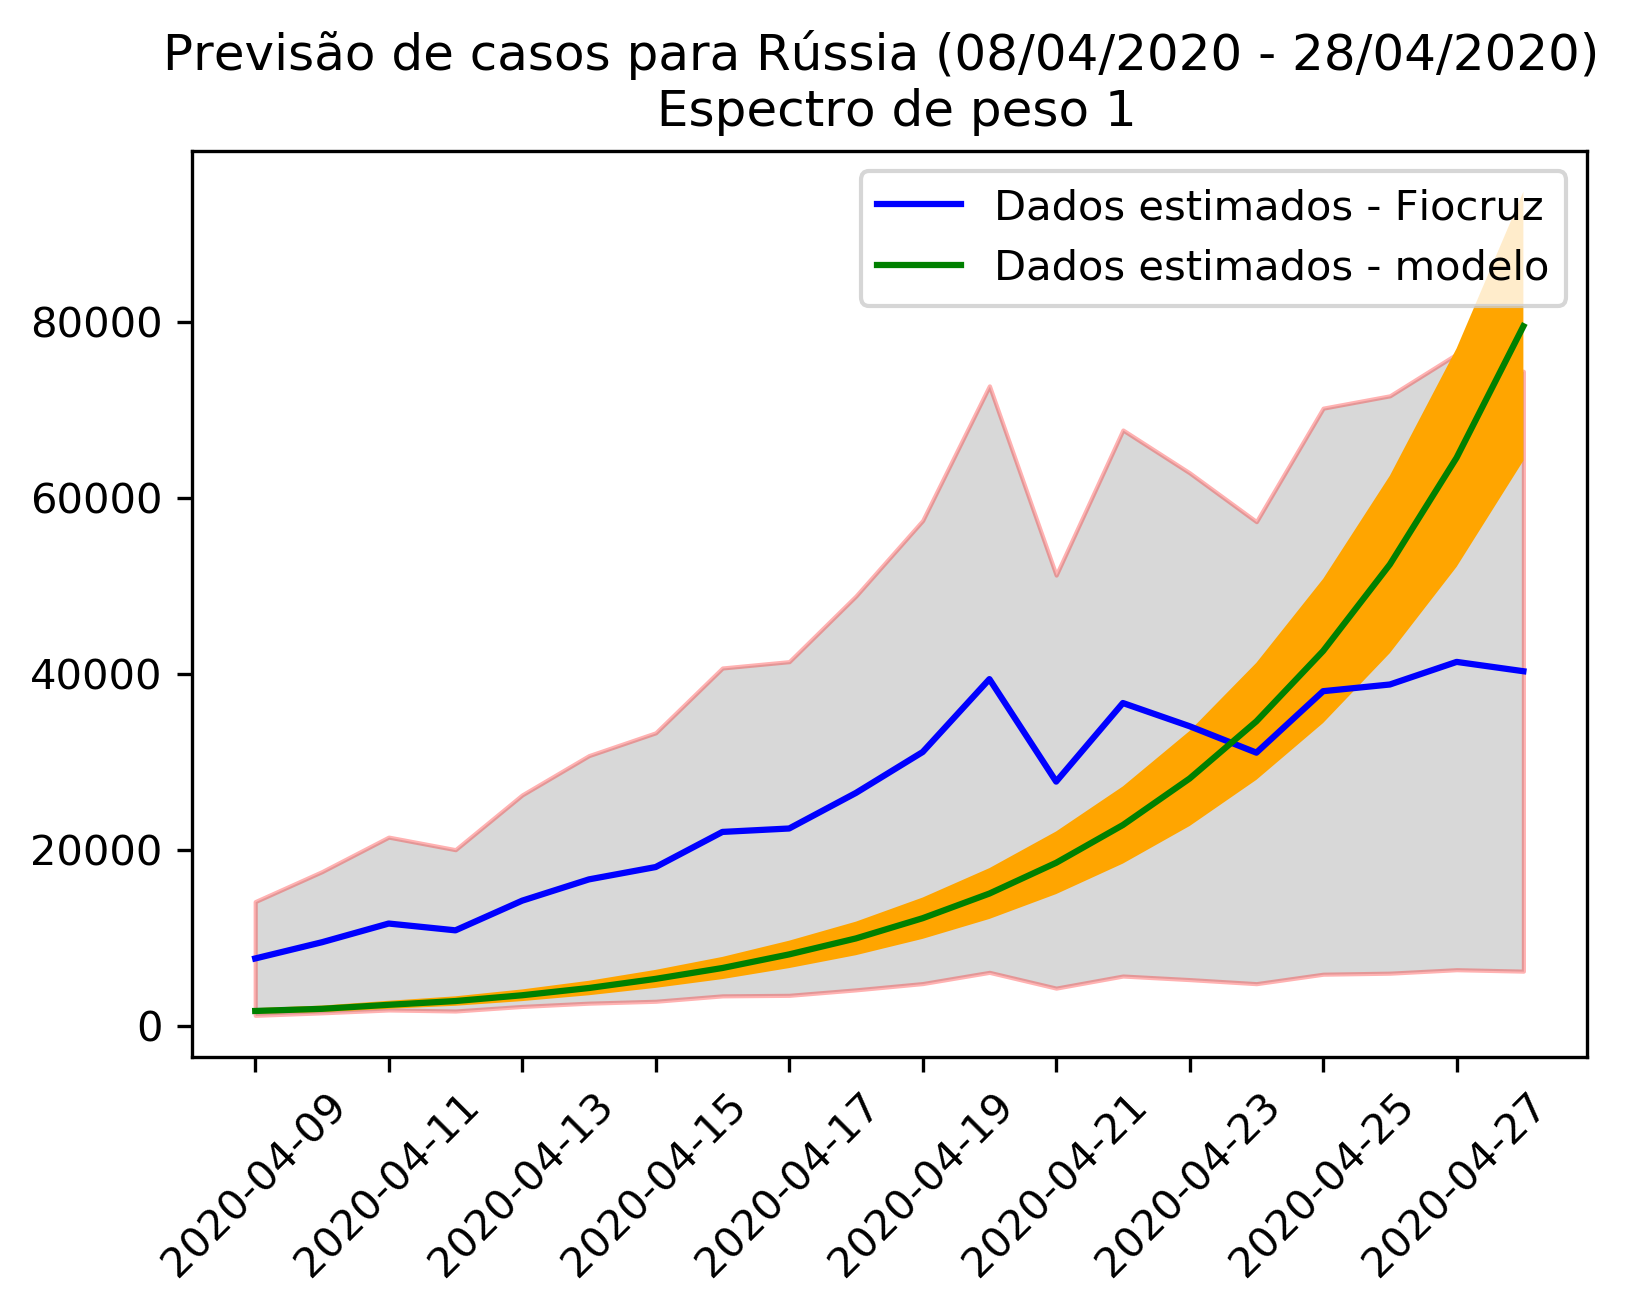

In [26]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para Rússia ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation=45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

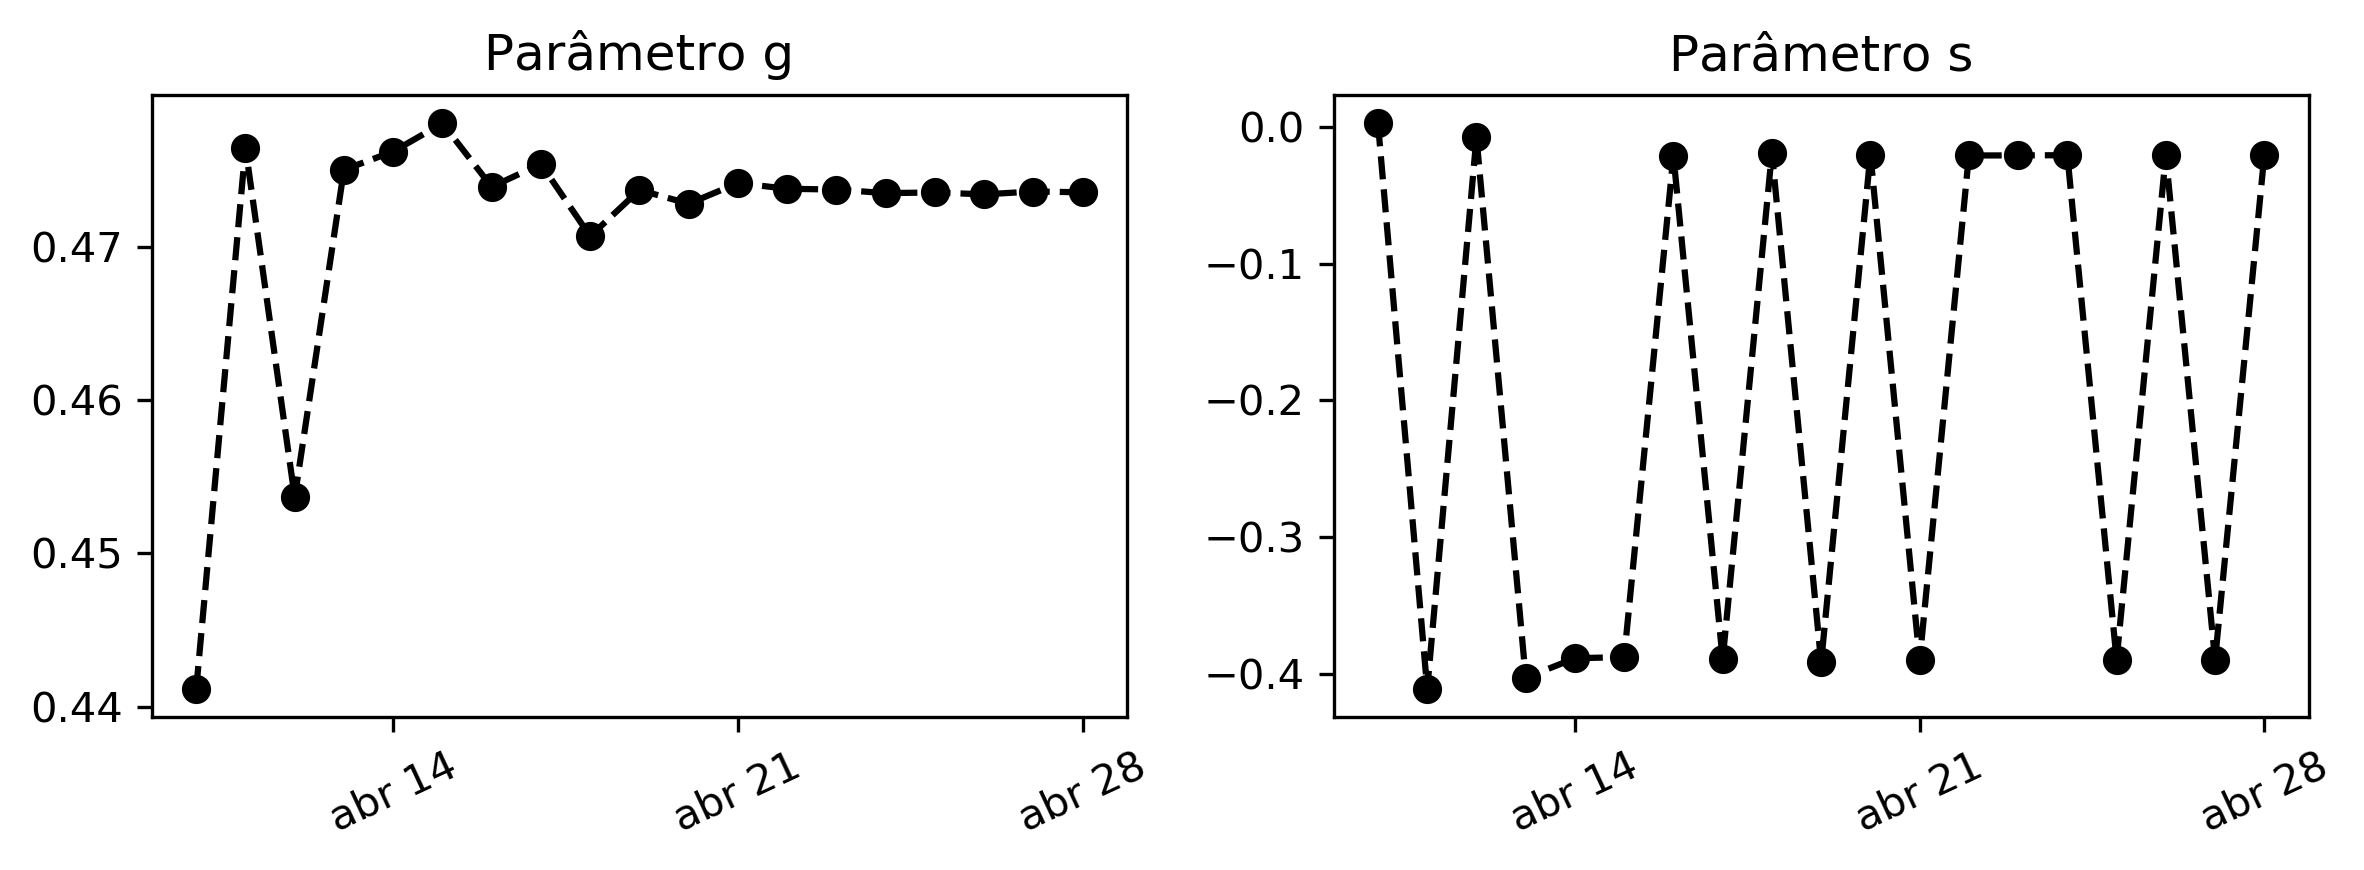

In [27]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Rússia - Espectro de peso 2**

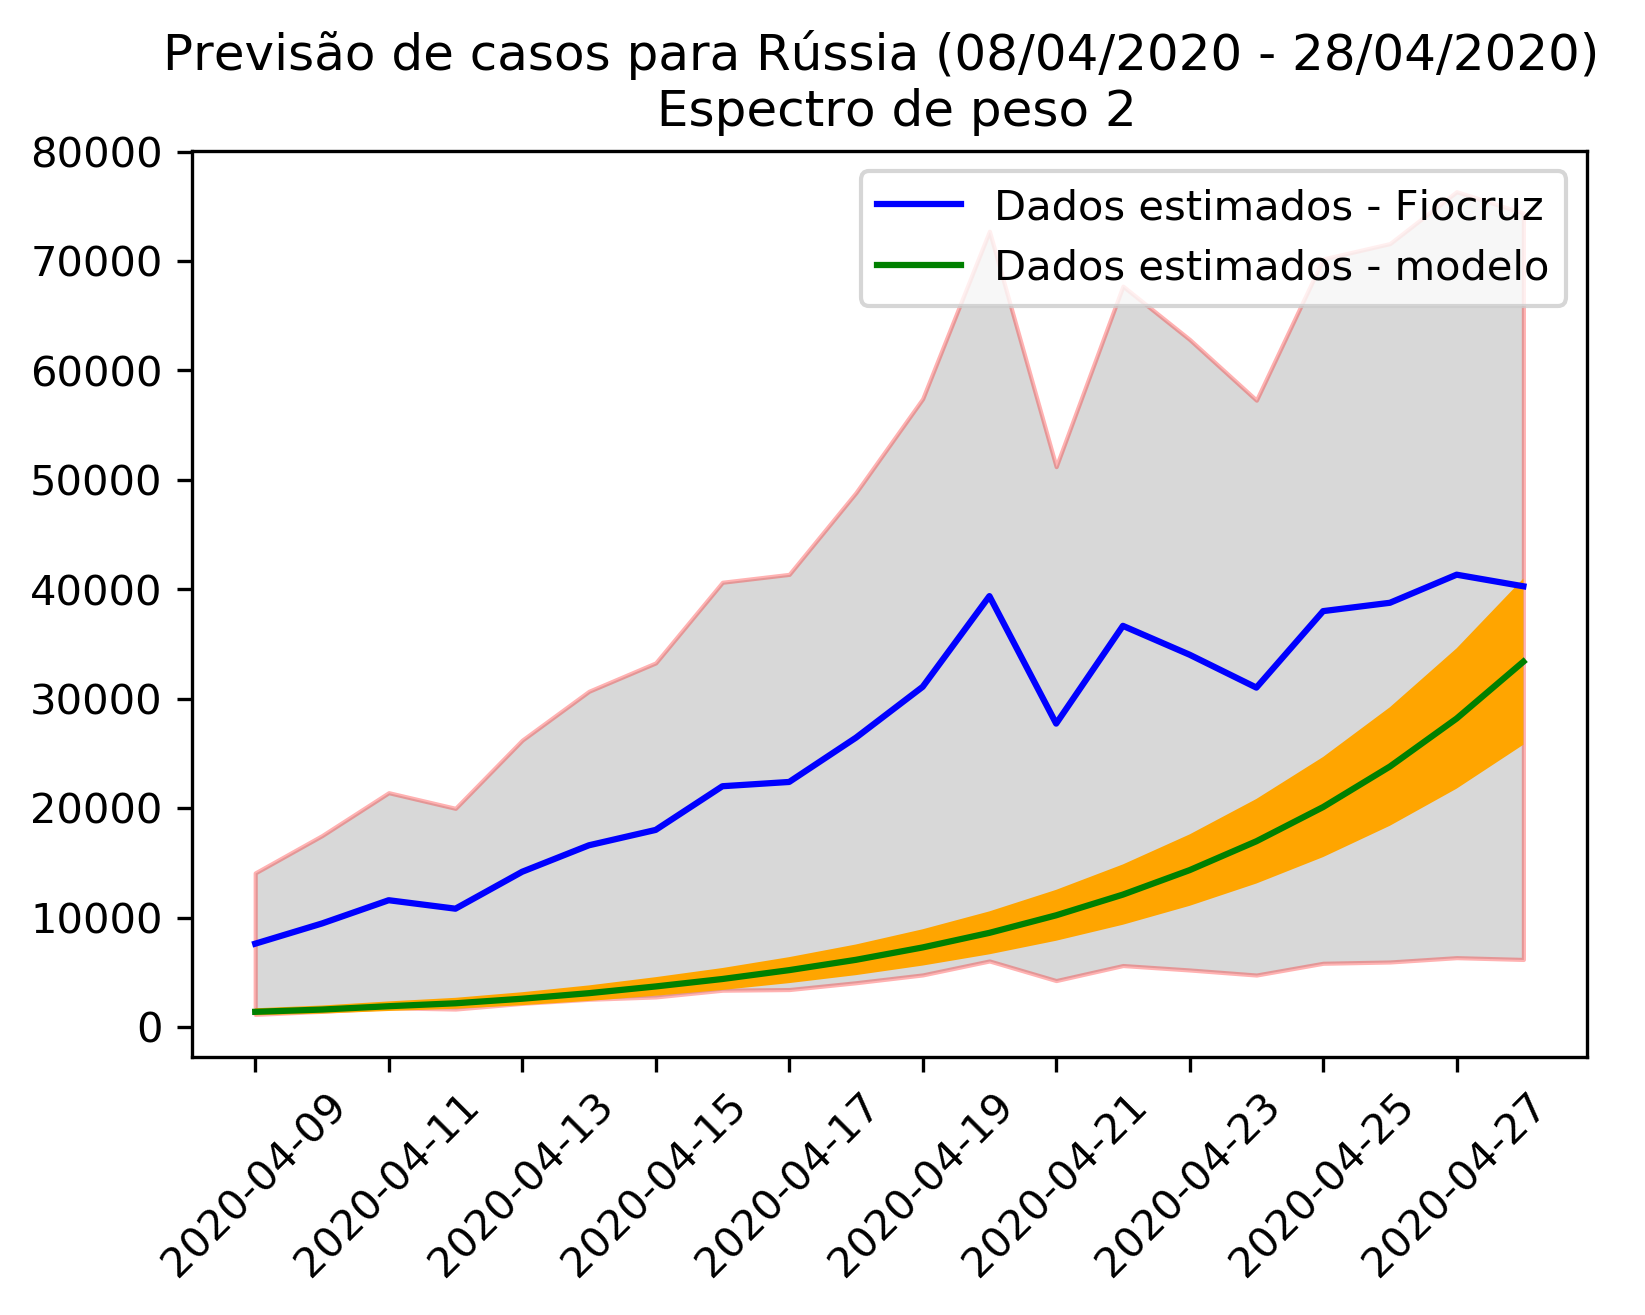

In [28]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para Rússia ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

## Dados regionais

Esta seção apresenta a aplicação do modelo em dados regionais, especificamente para o estado de Minais Gerais (MG) e Niterói. Inicialmente os dados são carregados.

In [29]:
national = pd.read_csv('blueteam_national_update_2020_06_03.csv')

**Configurações das predições**

Da mesma forma como feito para os dados nacionais, abaixo há uma seção de código para a configuração da maneira como o modelo vai trabalhar e gerar seus resultados.


In [30]:
days_to_predict = 20
start_date = '2020-04-08'

plot_date_start = '08/04/2020'
plot_date_end = '28/04/2020'

**Estado de Minas Gerais - Espectro de peso 1**

Para gerar a predição dos dados regionais com o modelo desenvolvido, faz-se a aplicação de um filtro nos dados, especificando que os dados considerados são os de MG

In [31]:
data = national[national['state'] == 'MG']
data = data[data['place_type'] == 'state']
data.set_index('date', inplace = True)
data = data.sort_index()
data['new_cases'] = data.new_confirmed
data = generate_fiocruz_datamean(data)

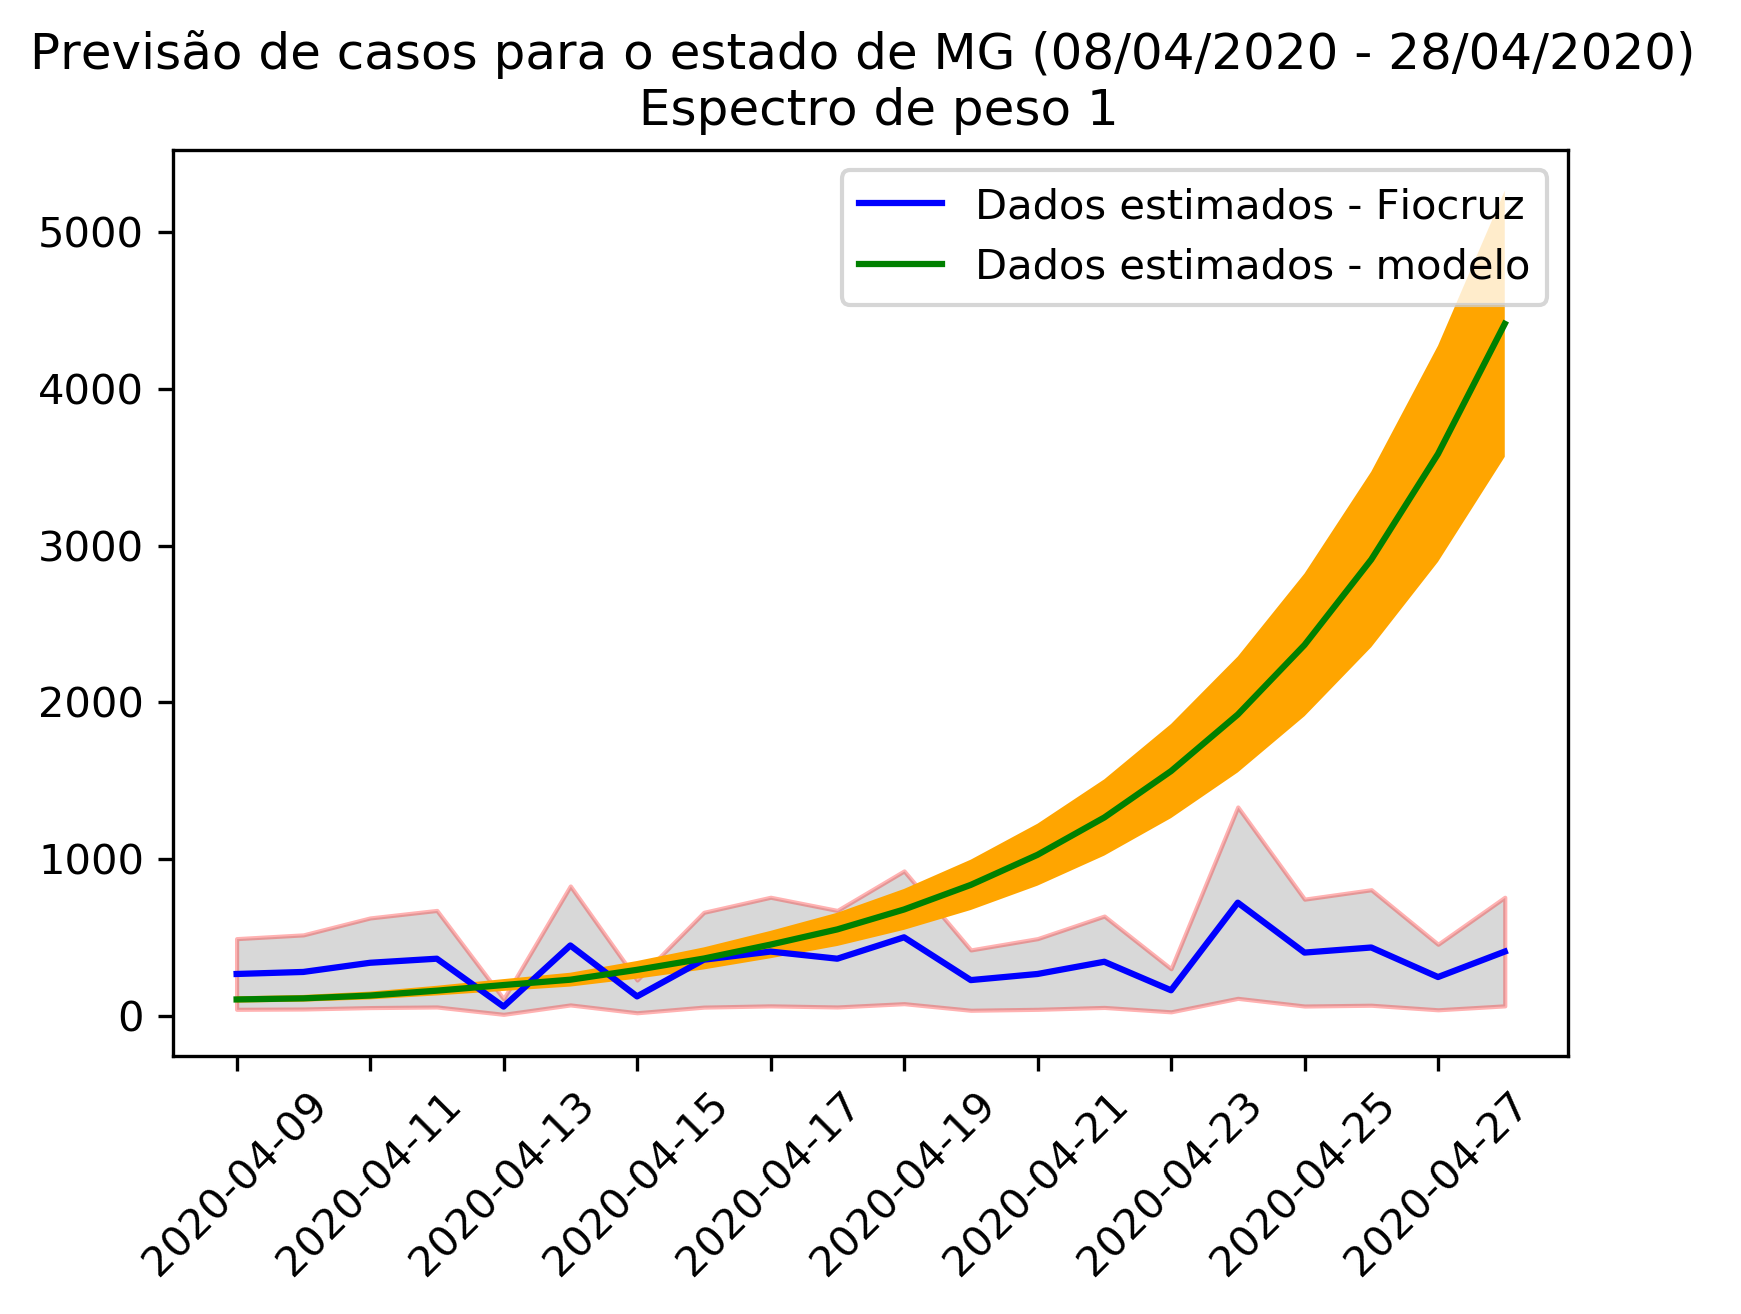

In [32]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o estado de MG ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

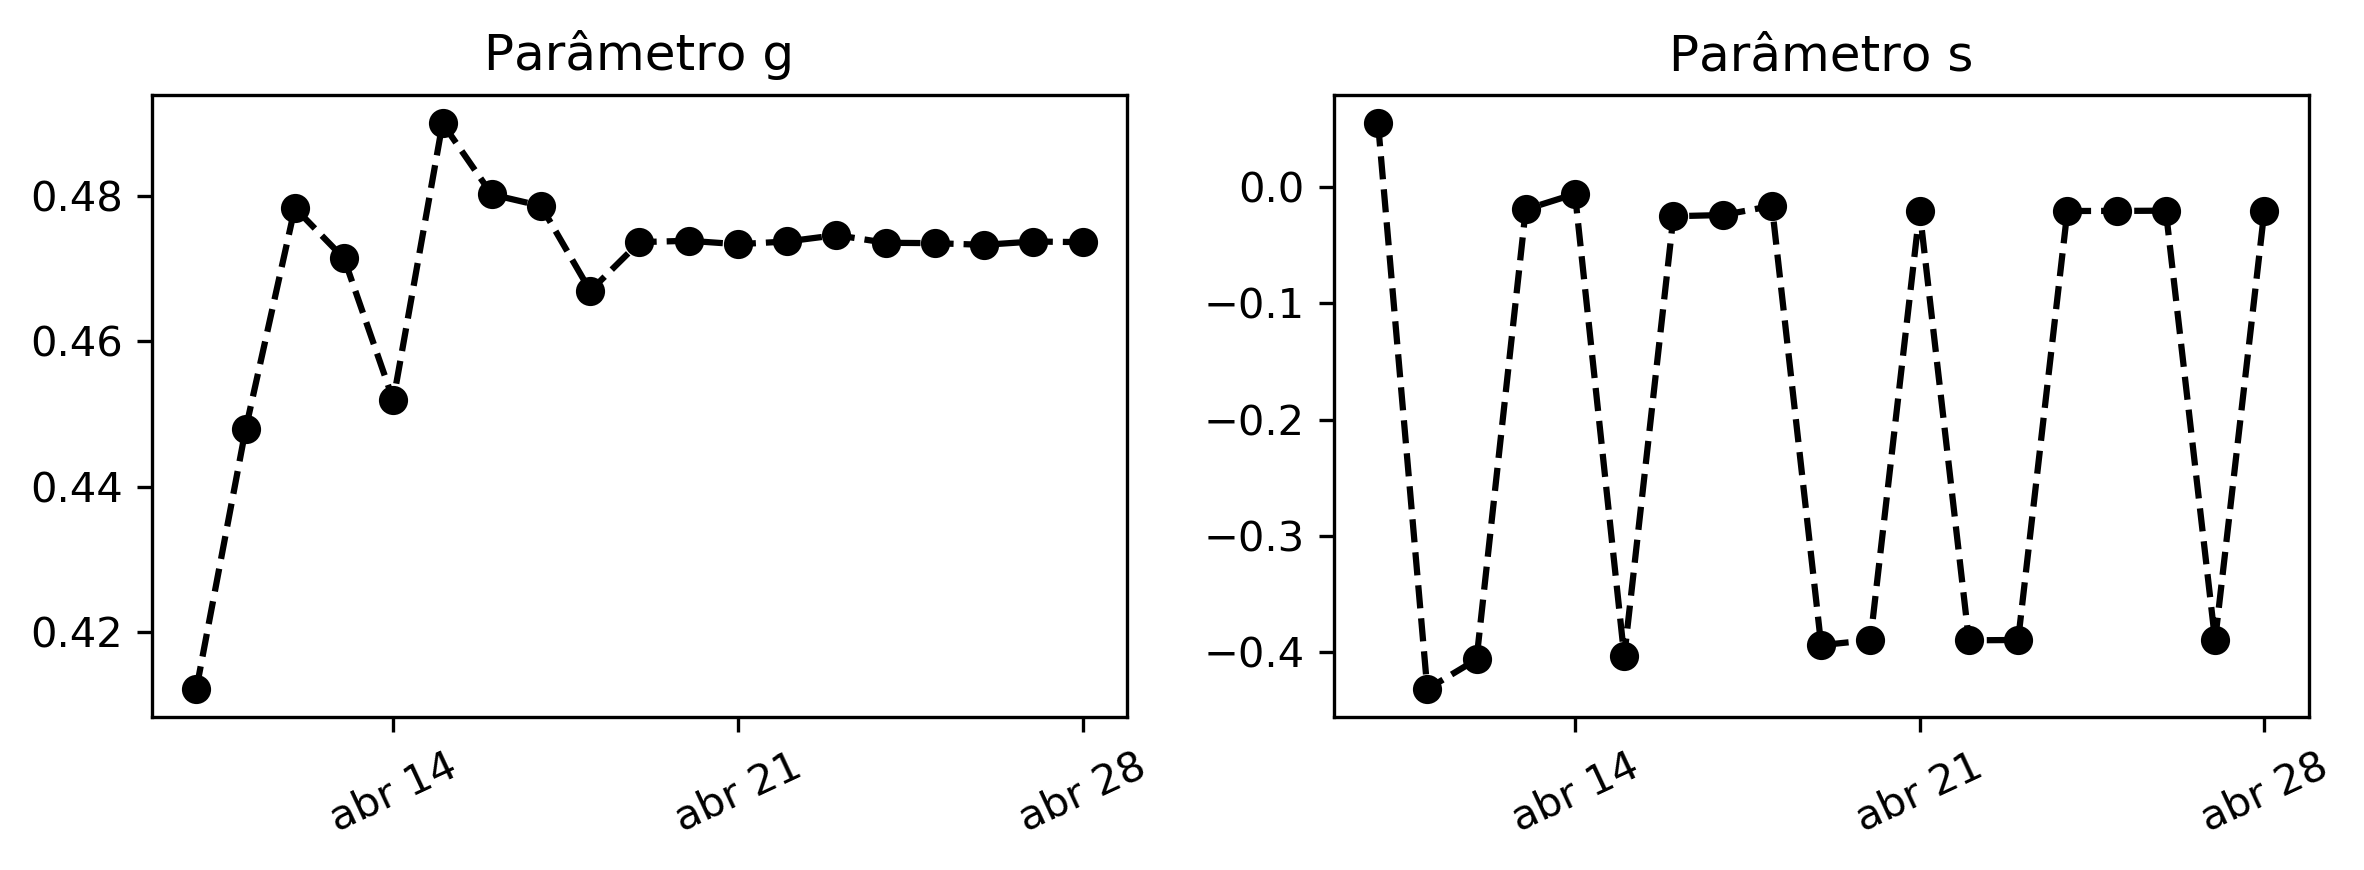

In [33]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Estado de Minas Gerais - Espectro de peso 2**

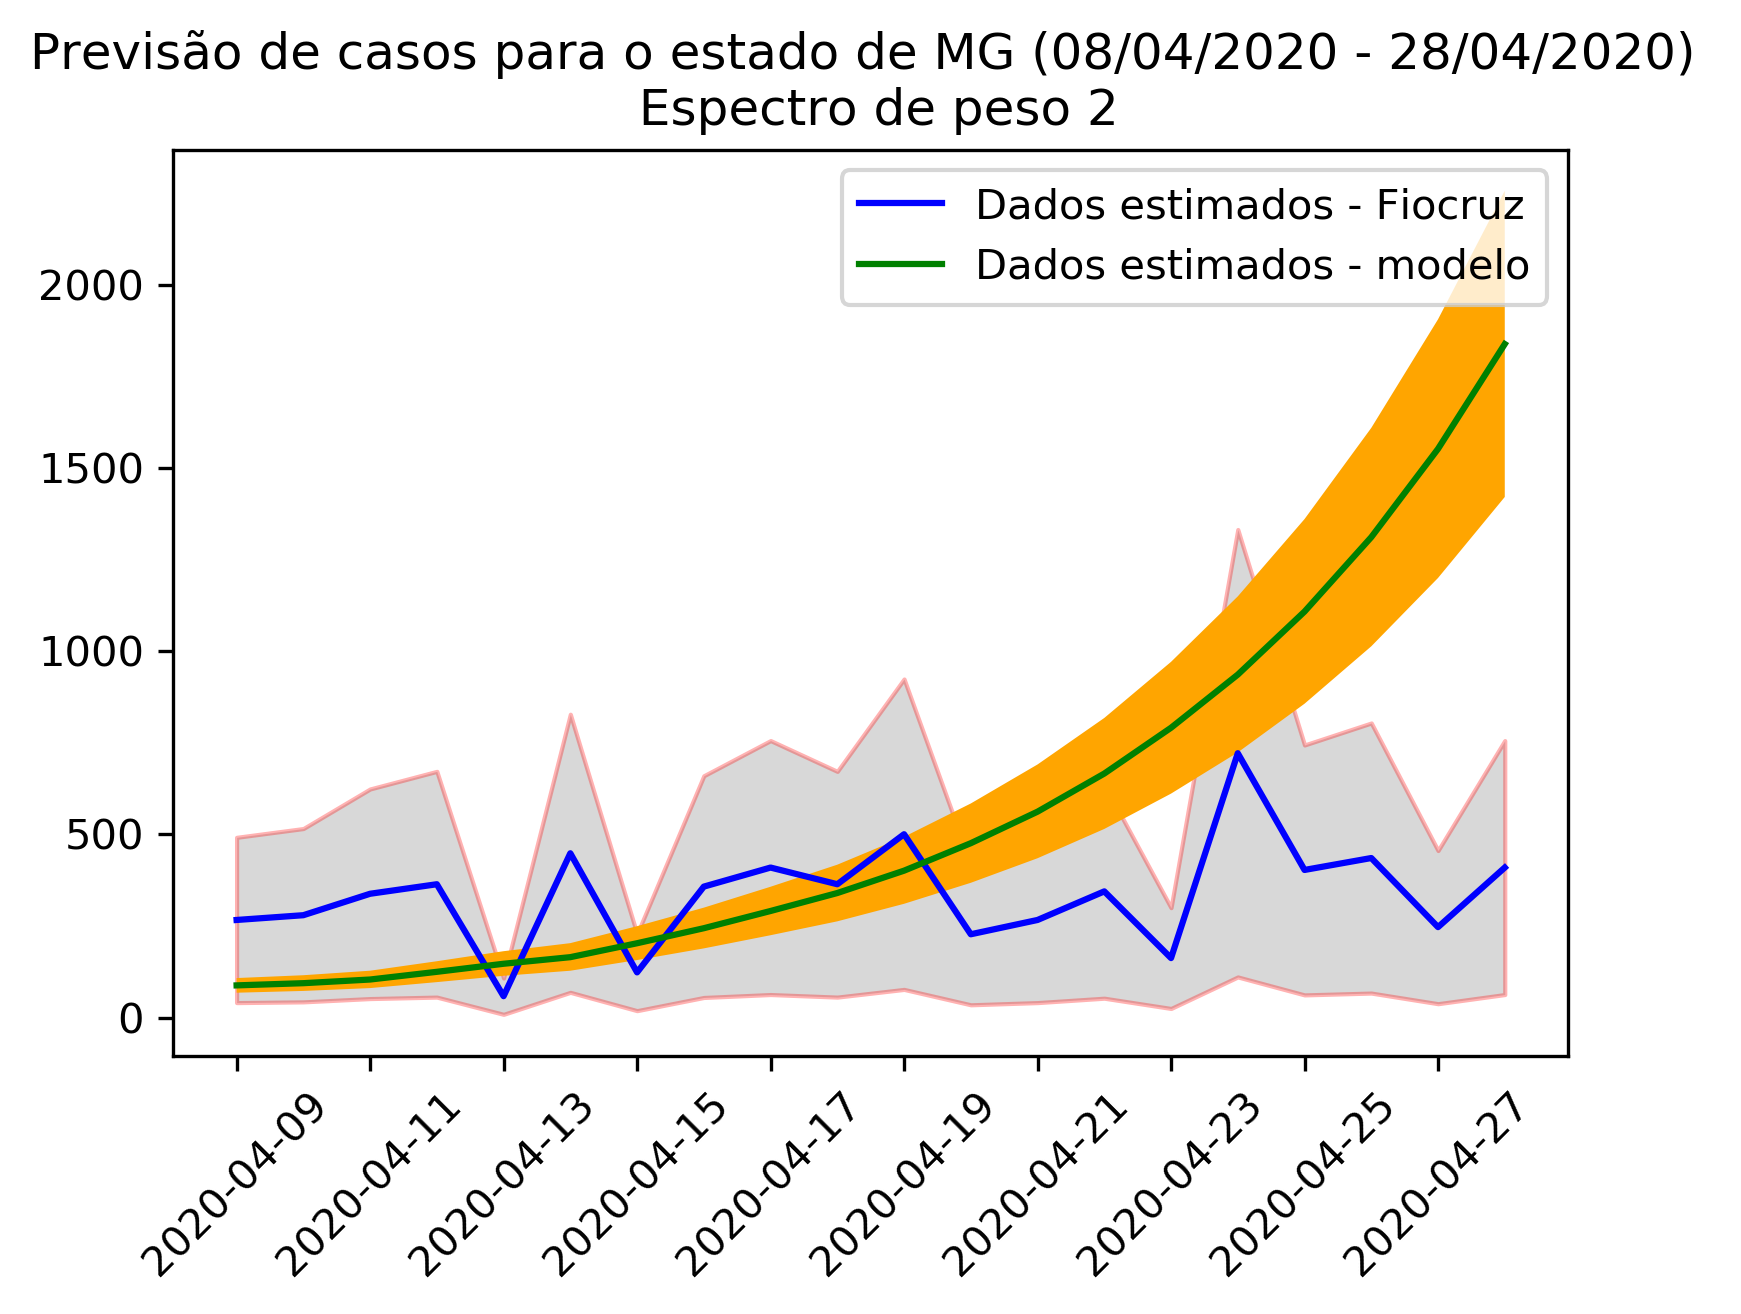

In [34]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o estado de MG ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

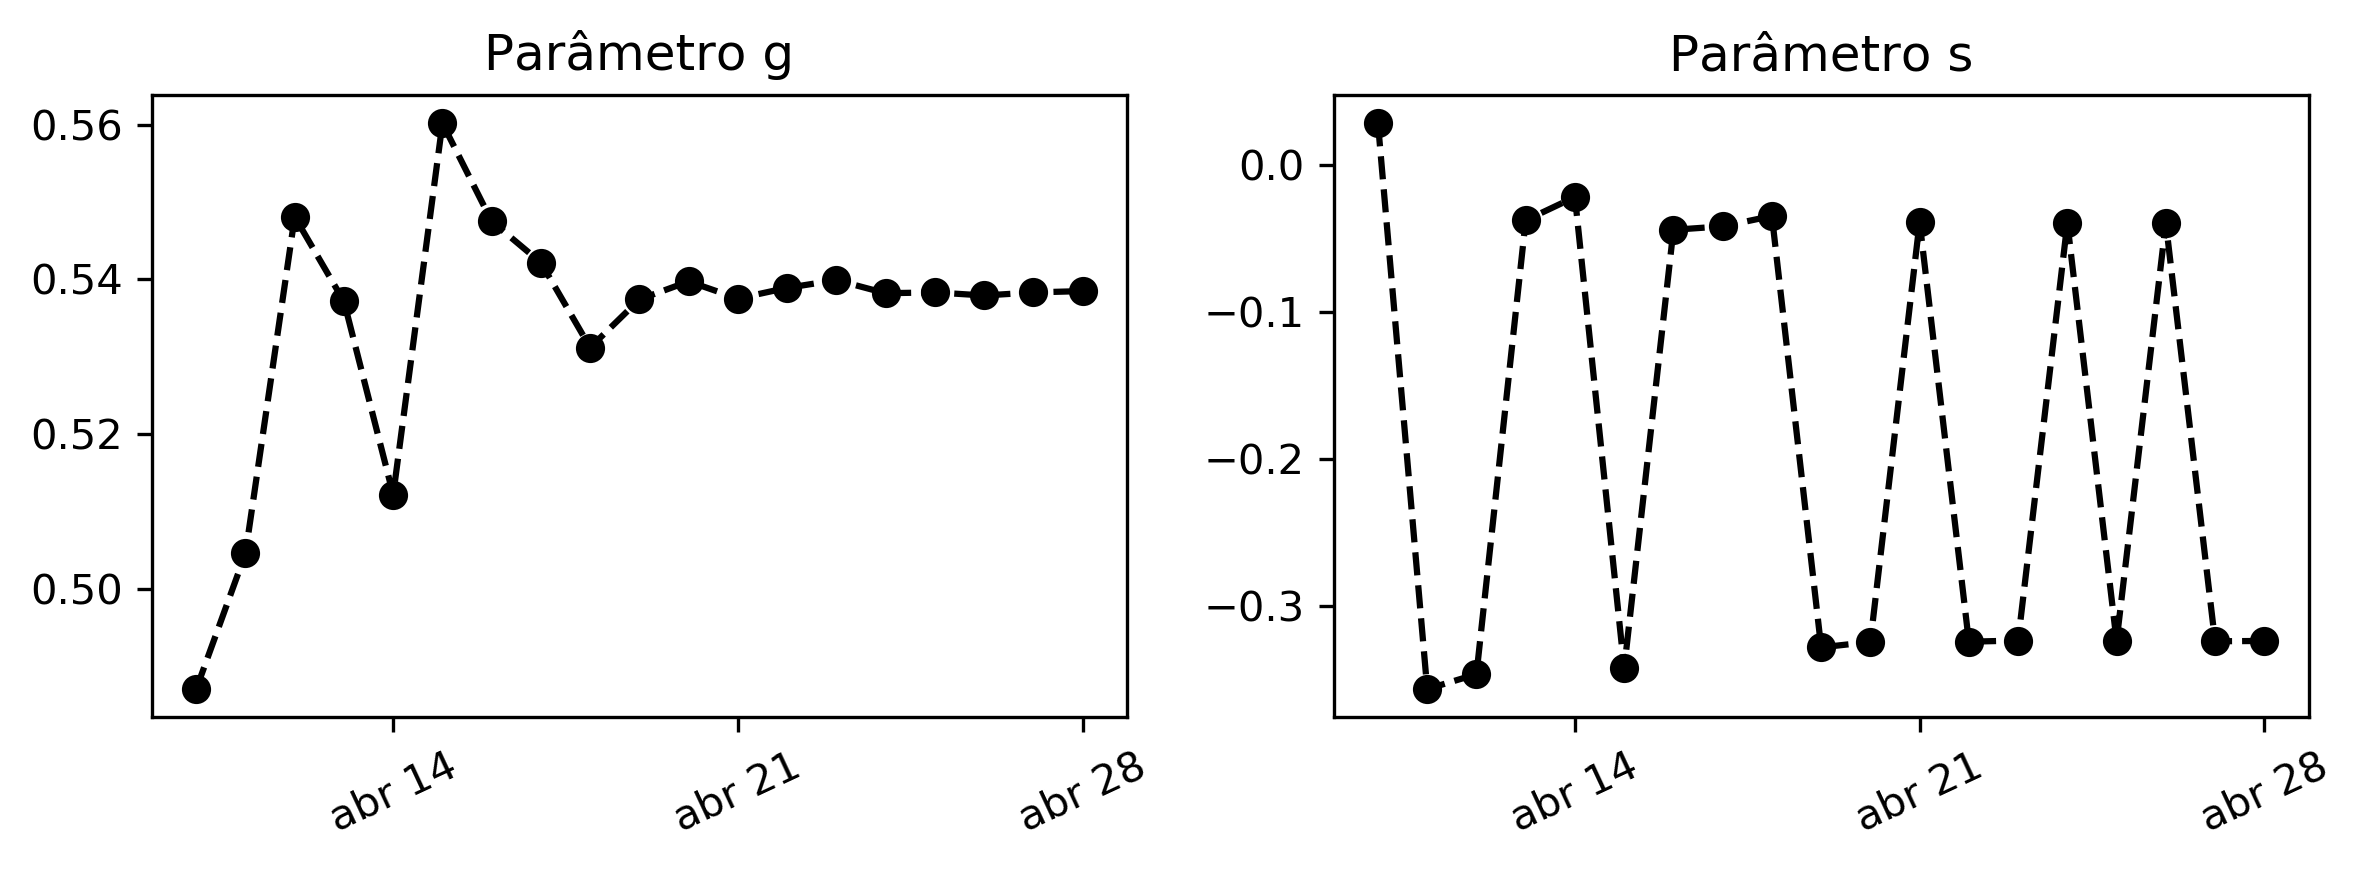

In [35]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Niterói - Espectro de peso 1**

In [36]:
data = national[national['state'] == 'RJ']
data.set_index('date', inplace = True)
data = data.sort_index()
idx = data[data.new_confirmed > 0].index
data = data.groupby(['date', 'state']).sum()
data = data[data.new_confirmed > 0]
data['new_cases'] = data.new_confirmed

data = pd.DataFrame({
    'new_cases': data.new_cases.values,
}, index = idx)
data = generate_fiocruz_datamean(data)

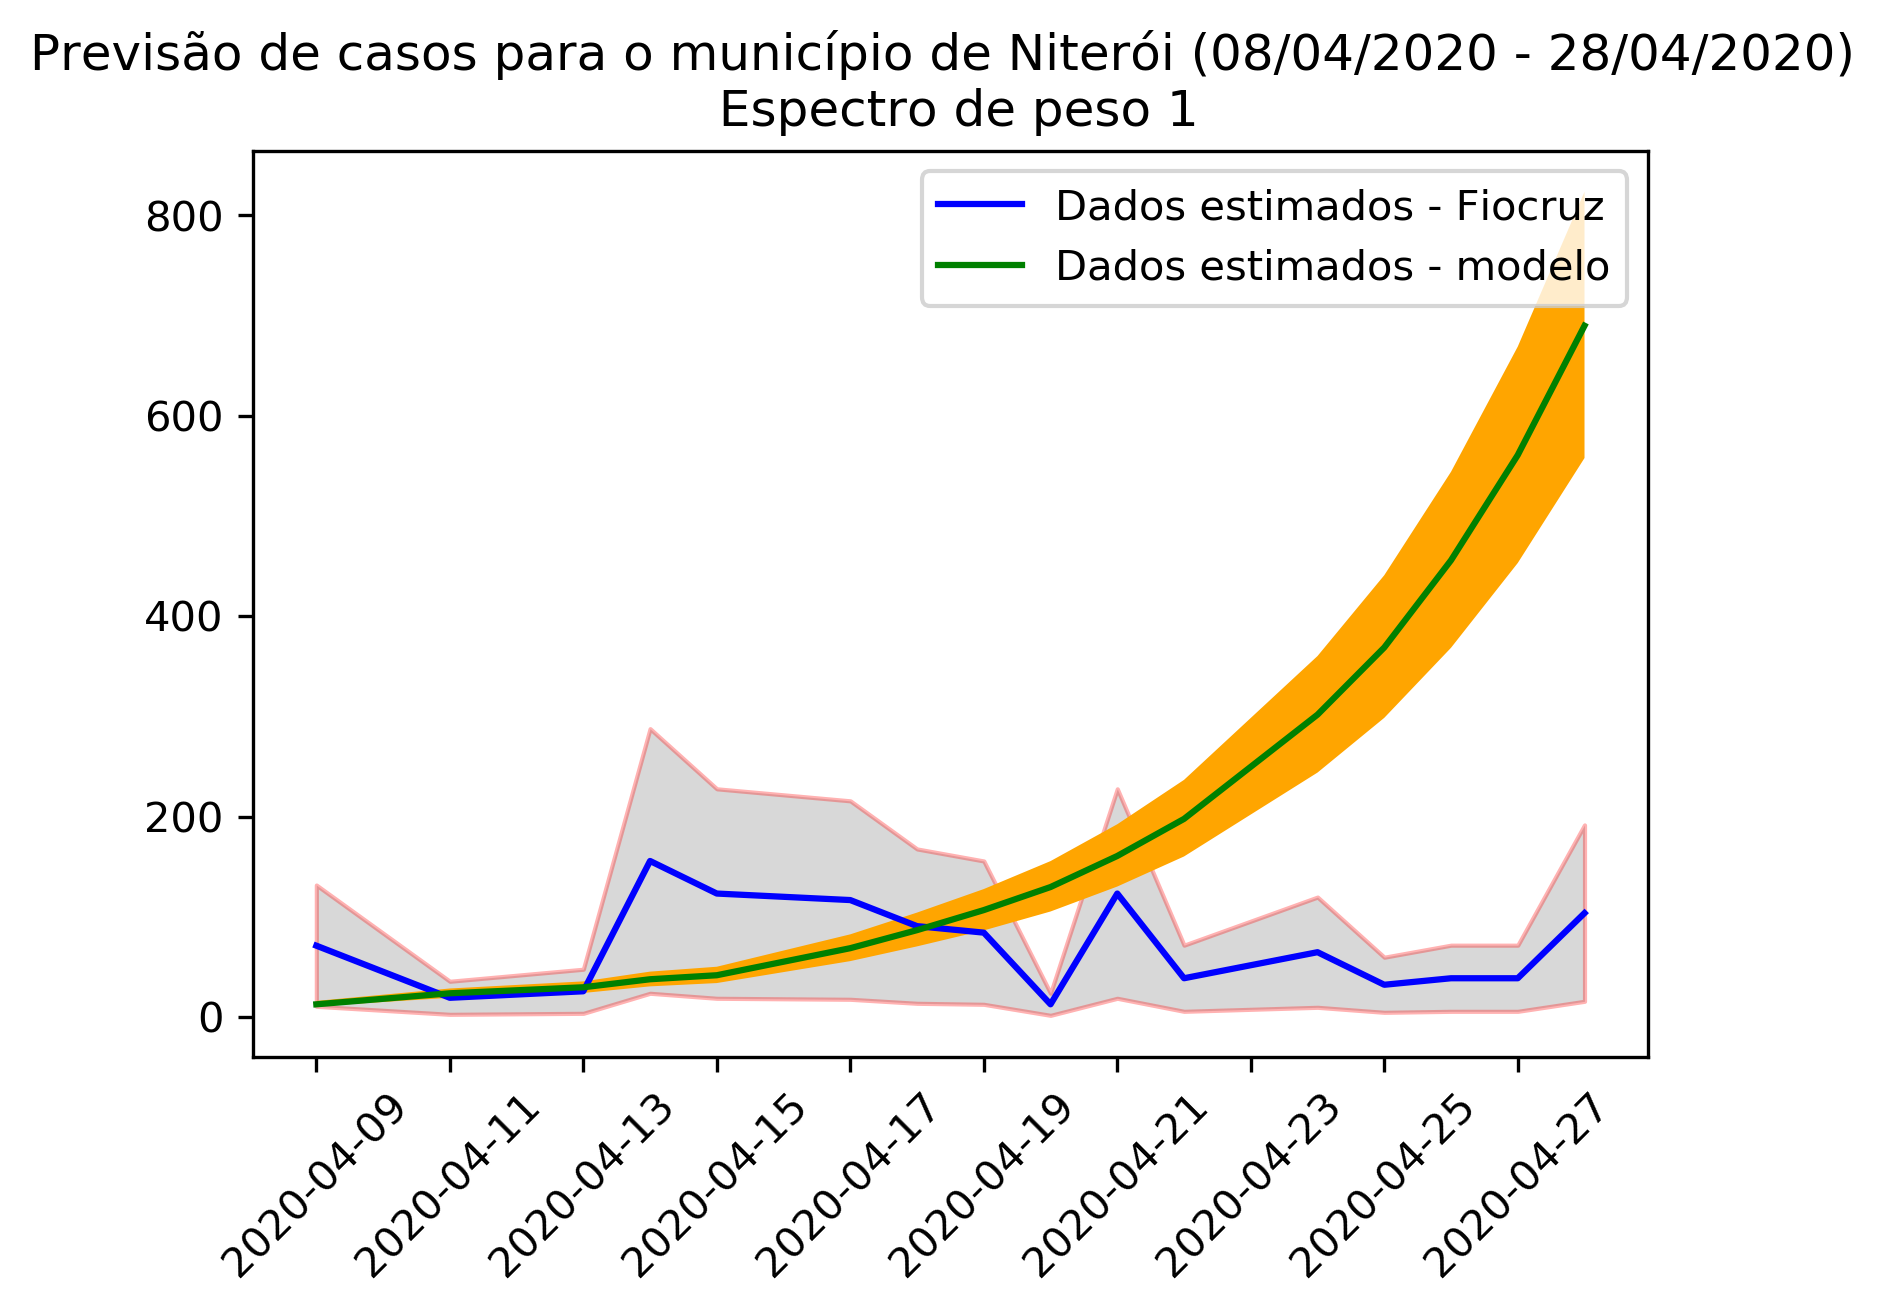

In [37]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase1, 
                             isIncomplete = True, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o município de Niterói ({plot_date_start} - {plot_date_end}) \n Espectro de peso 1")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

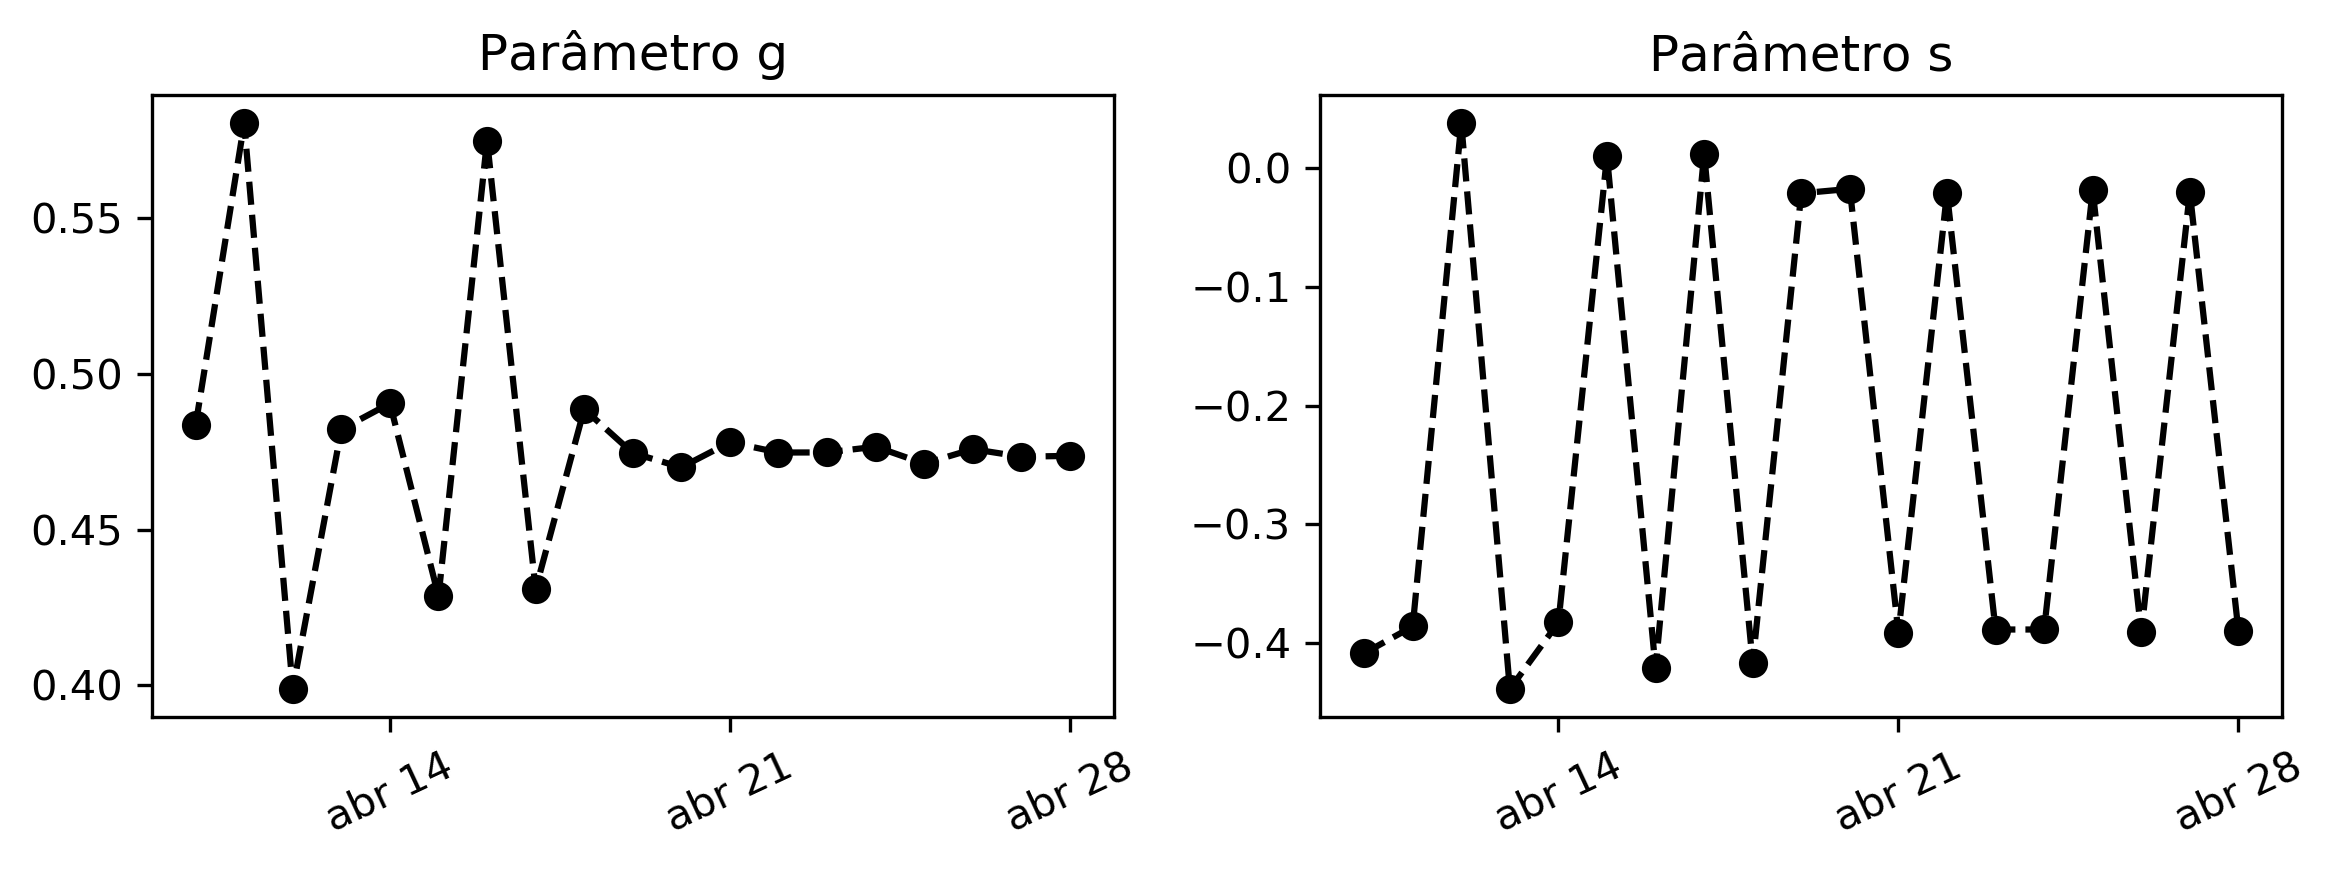

In [38]:
plot_g_and_s(generated_parameters, generated_supression_parameters)

**Niterói - Espectro de peso 2**

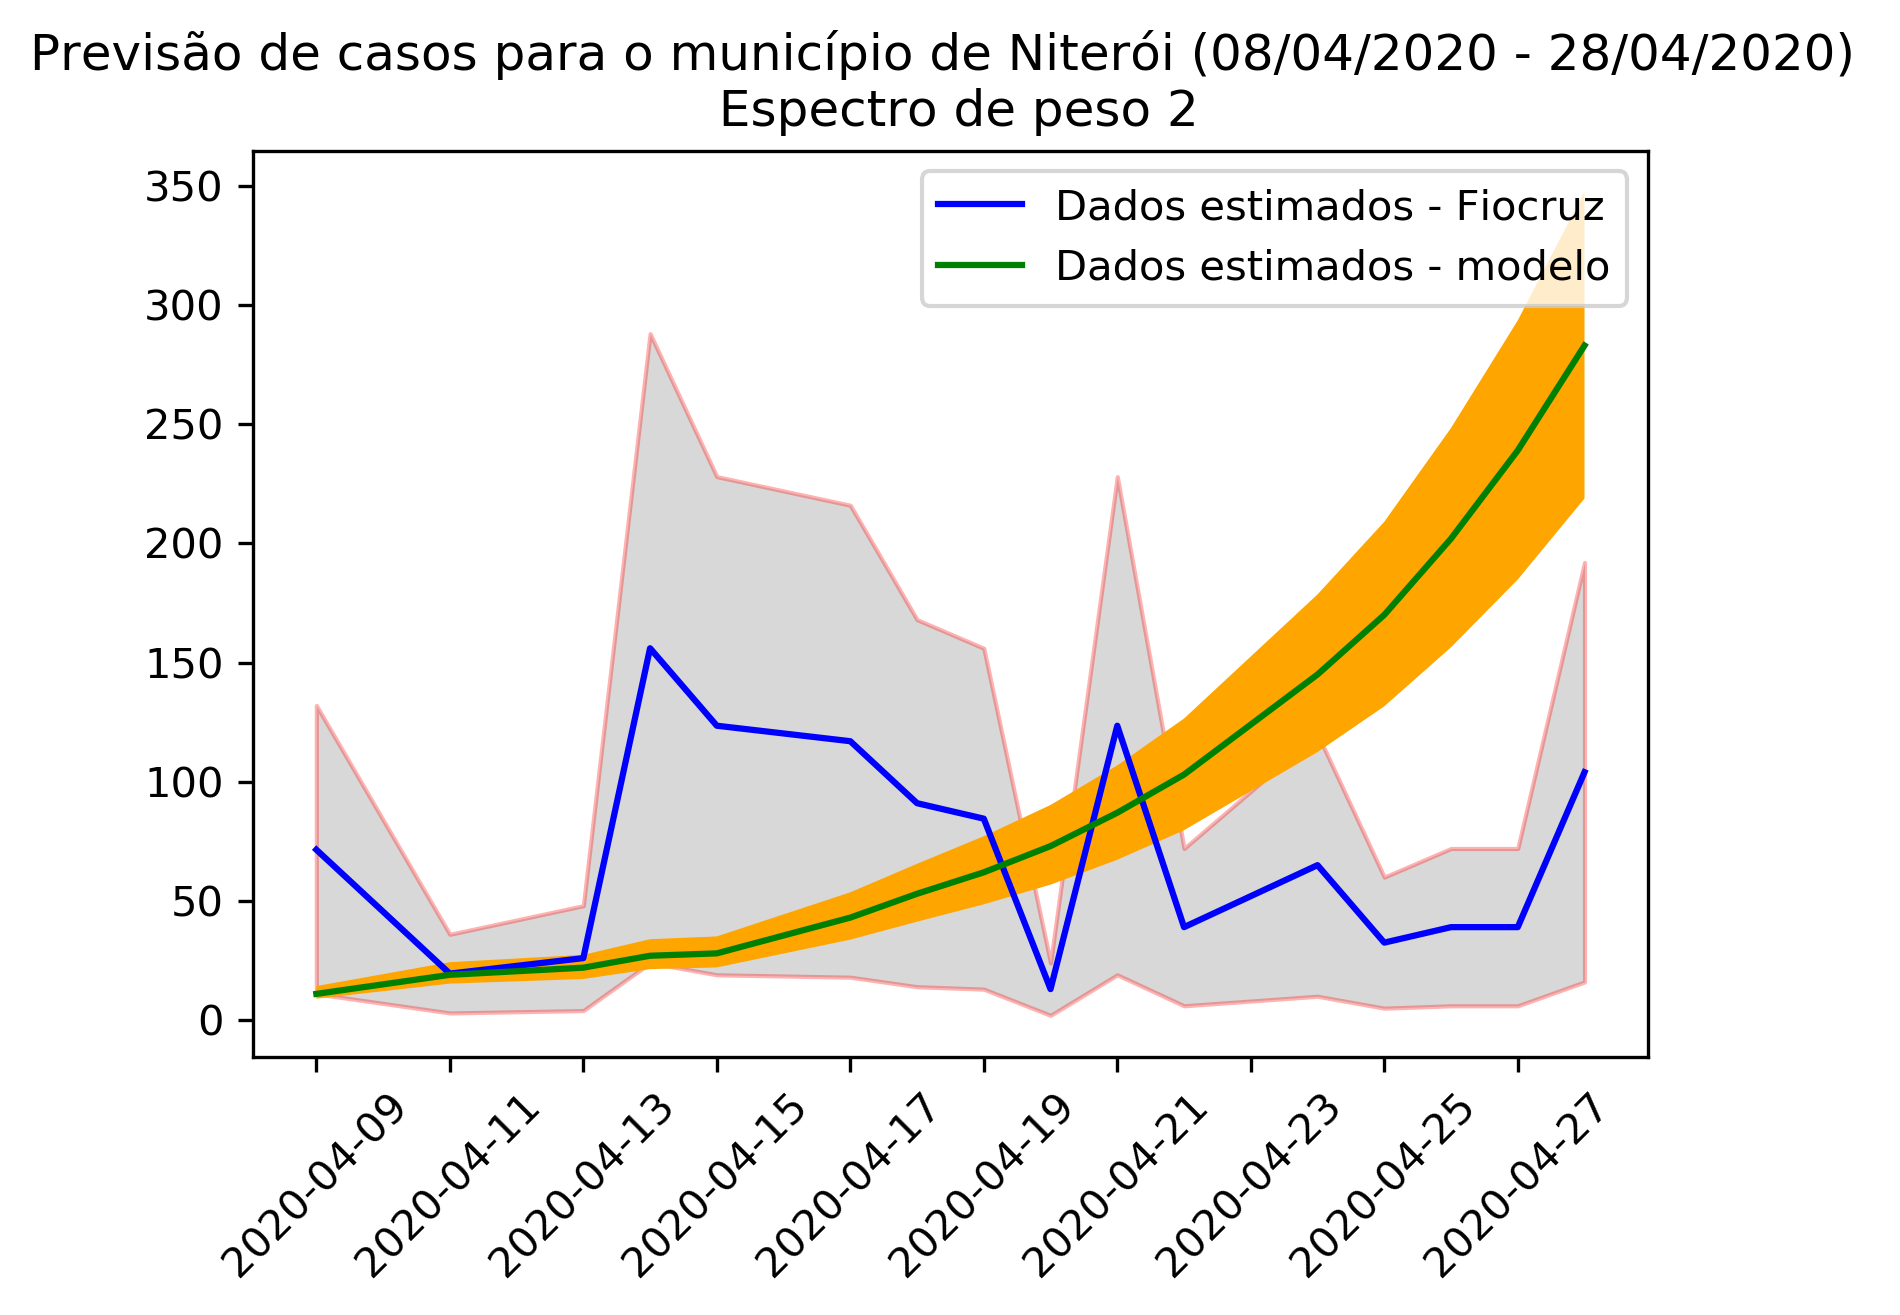

In [39]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = True, usePredict = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o município de Niterói ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

Abaixo é feita a geração de $g$ e $s$

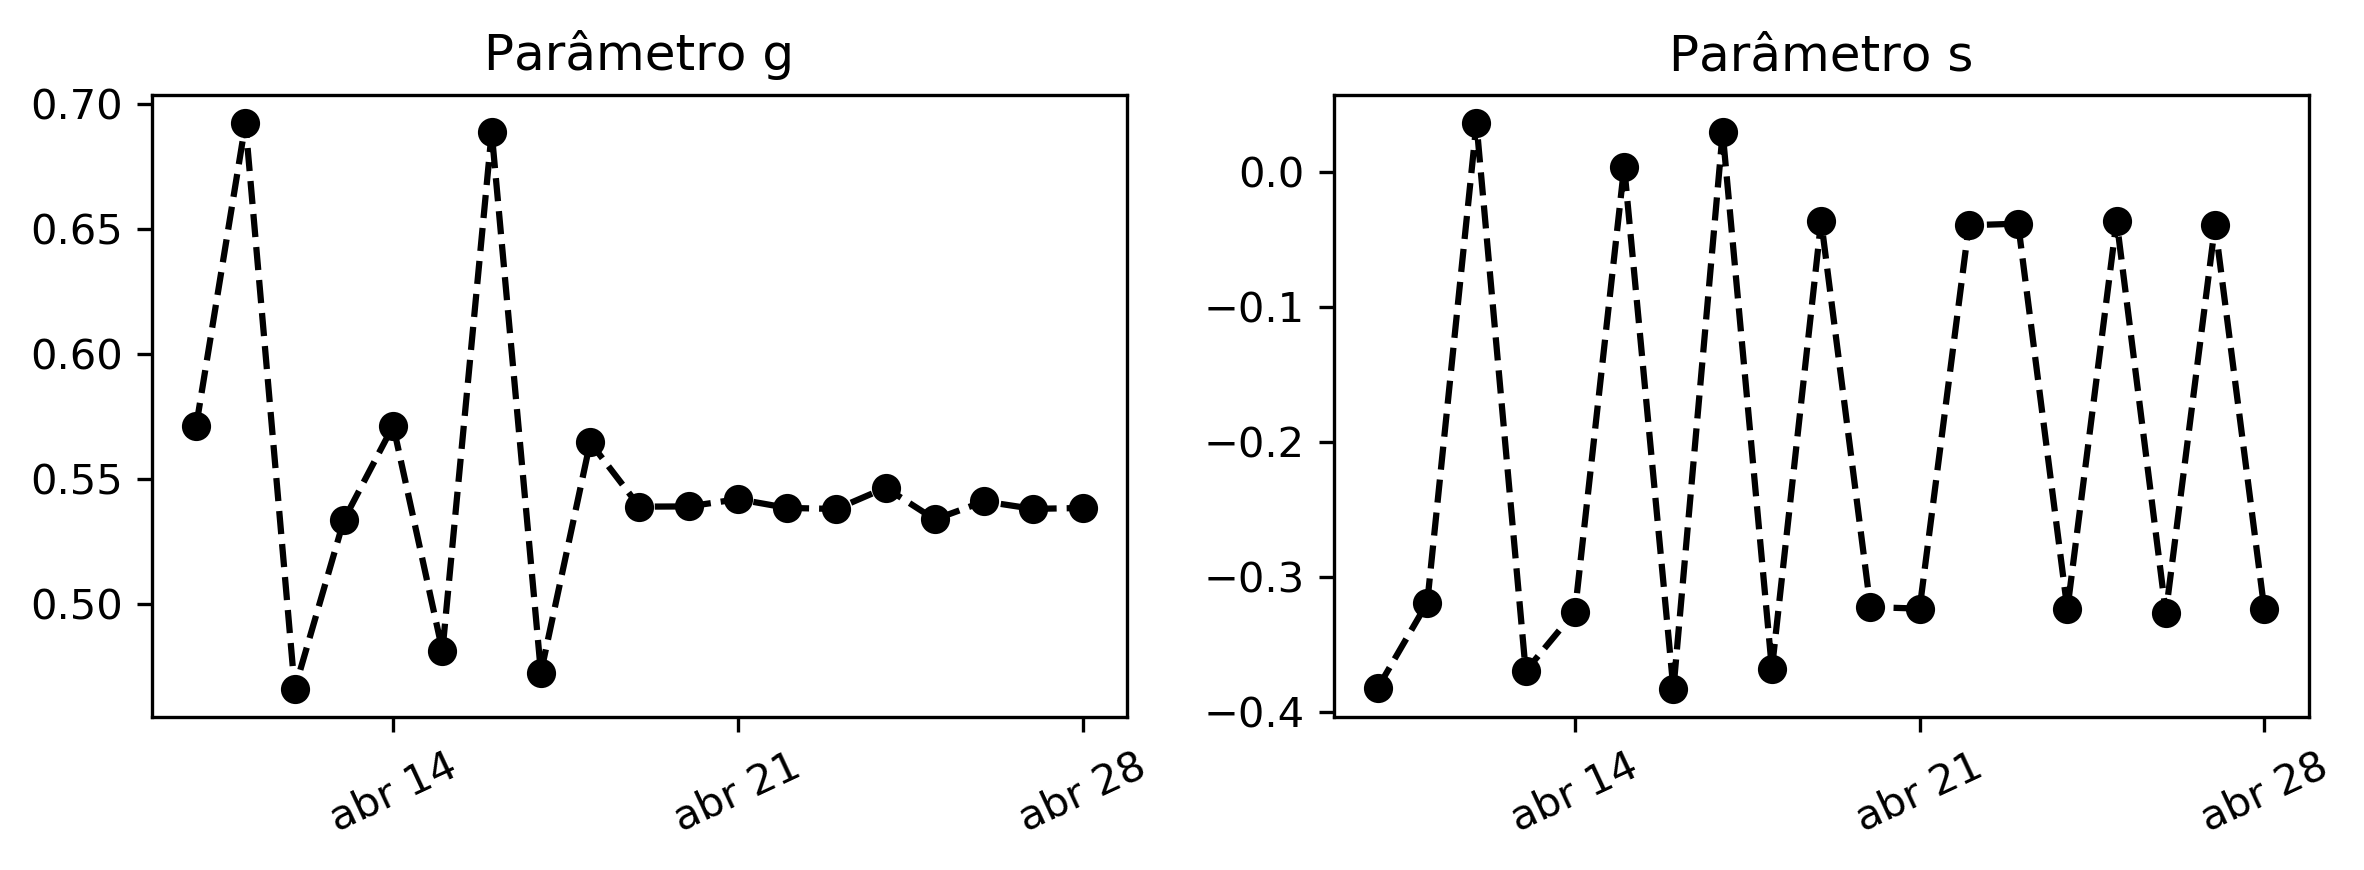

In [40]:
plot_g_and_s(generated_parameters, generated_supression_parameters)